In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
df = pd.read_excel('/Users/madhusudhanunnava/Desktop/grub hub.xlsx', sheet_name='grubhub')

In [3]:
df.head()

searched_zipcode  searched_lat  searched_lng  \
0             11216     40.678832    -73.950677   
1             11216     40.678832    -73.950677   
2             11216     40.678832    -73.950677   
3             11216     40.678832    -73.950677   
4             11216     40.678832    -73.950677   

                          searched_address searched_state searched_city  \
0  300 Madison St, Brooklyn, NY 11216, USA             NY      Brooklyn   
1  300 Madison St, Brooklyn, NY 11216, USA             NY      Brooklyn   
2  300 Madison St, Brooklyn, NY 11216, USA             NY      Brooklyn   
3  300 Madison St, Brooklyn, NY 11216, USA             NY      Brooklyn   
4  300 Madison St, Brooklyn, NY 11216, USA             NY      Brooklyn   

  searched_metro is_gh   latitude  longitude  ...  delivery_fee delivery_time  \
0             NY   Yes  40.678829 -73.949867  ...          0.00          40.0   
1             NY   Yes  40.678715 -73.949875  ...          0.00          45.0   
2             NY   Yes  40.678879 -73.949448  ...          1.99          27.5   
3             NY   Yes  40.678638 -73.949463  ...          1.99          30.0   
4             NY   Yes  40.678226 -73.949440  ...          1.99          30.0   

   service_fee       phone review_count review_rating             RunDate  \
0         0.00  3476278080         1691          4.57 2022-04-25 00:00:00   
1         0.00  7188577011          697          4.77 2022-04-25 07:01:11   
2        10.00  7186223222           11          3.67 2022-04-25 07:01:11   
3         7.25  3472408610          208          4.05 2022-04-25 07:01:11   
4         5.25  7188726299            0          0.00 2022-04-25 07:01:11   

   delivery_type  Time of the day Grouped Times  
0           SELF         08:29:11           8-9  
1           SELF         20:59:47         20-21  
2        GRUBHUB         07:08:42           7-8  
3        GRUBHUB         03:23:20           3-4  
4        GRUBHUB         09:04:35          9-10  

[5 rows x 26 columns]

In [4]:
# Counts NaN values in each column (interpreted as cells not being used for analysis)
nan_counts_per_column = df.isnull().sum()

# Prints the counts
print(nan_counts_per_column)


searched_zipcode    0
searched_lat        0
searched_lng        0
searched_address    0
searched_state      0
searched_city       0
searched_metro      0
is_gh               0
latitude            0
longitude           0
distance            0
loc_name            0
loc_number          0
url                 0
address             0
Cuisine             0
delivery_fee        0
delivery_time       0
service_fee         0
phone               0
review_count        0
review_rating       0
RunDate             0
delivery_type       0
Time of the day     0
Grouped Times       0
dtype: int64


In [5]:
# Defining a dictionary mapping column names to desired data types
data_types = {
    'searched_zipcode': 'category',  # Zip codes as category due to non-numeric nature
    'searched_lat': 'float',  # Latitude values
    'searched_lng': 'float',  # Longitude values
    'searched_address': 'string',  # Address as string
    'searched_state': 'category',  # States as category for efficiency
    'searched_city': 'category',  # Cities as category for efficiency
    'searched_metro': 'category',  # Metro areas as category
    'is_gh': 'bool',  # Boolean flags
    'latitude': 'float',  # Latitude values
    'longitude': 'float',  # Longitude values
    'distance': 'float',  # Numeric distance
    'loc_name': 'string',  # Location name as string
    'loc_number': 'string',  # Location number as string to preserve any leading zeros
    'url': 'string',  # URL as string
    'address': 'string',  # Address as string
    'Cuisine': 'category',  # Cuisine types as category
    'delivery_fee': 'float',  # Processed delivery fee as numeric
    'delivery_time': 'float',  # Delivery time likely requires decimal precision
    'service_fee': 'float',  # Service fee as numeric
    'phone': 'string',  # Phone numbers as string to preserve formatting
    'review_count': 'int',  # Review counts as integers
    'review_rating': 'float',  # Ratings typically need decimal precision
    'RunDate': 'datetime64[ns]',  # Dates should be in datetime format
    'delivery_type': 'category',  # Delivery types as category
    'Time of the day': 'category',  # Time categories
    'Grouped Times': 'category'  # Grouped time slots as category
}

# Applying the data type conversions
for column, data_type in data_types.items():
    try:
        df[column] = df[column].astype(data_type)
    except Exception as e:
        print(f"Error converting column '{column}' to '{data_type}':", e)

# Verifing the conversions
print(df.dtypes)

searched_zipcode          category
searched_lat               float64
searched_lng               float64
searched_address    string[python]
searched_state            category
searched_city             category
searched_metro            category
is_gh                         bool
latitude                   float64
longitude                  float64
distance                   float64
loc_name            string[python]
loc_number          string[python]
url                 string[python]
address             string[python]
Cuisine                   category
delivery_fee               float64
delivery_time              float64
service_fee                float64
phone               string[python]
review_count                 int64
review_rating              float64
RunDate             datetime64[ns]
delivery_type             category
Time of the day           category
Grouped Times             category
dtype: object


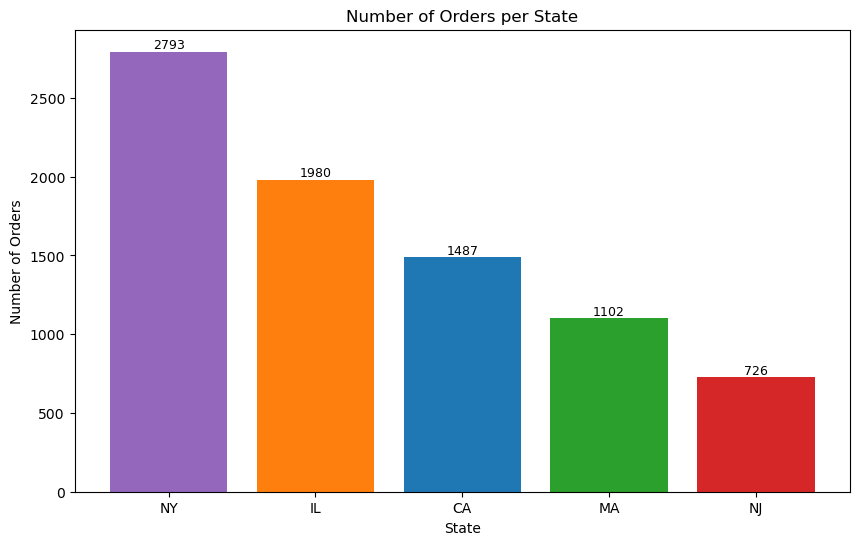

In [6]:
import matplotlib.pyplot as plt

# Data preparation: Count orders per state
orders_per_state = df['searched_state'].value_counts()

# State colors
state_colors = {
    'CA': '#1f77b4',  # blue
    'IL': '#ff7f0e',  # orange
    'MA': '#2ca02c',  # green
    'NJ': '#d62728',  # red
    'NY': '#9467bd'   # purple
}

# Created a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(orders_per_state.index, orders_per_state.values, color=[state_colors[state] for state in orders_per_state.index])
plt.title('Number of Orders per State')
plt.xlabel('State')
plt.ylabel('Number of Orders')

# Added data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=9)

plt.show()


In [7]:
import matplotlib.pyplot as plt

# Filtered data for only Grubhub deliveries in the df dataframe
grubhub_deliveries = df[df['delivery_type'] == 'GRUBHUB']

# Calculated the average delivery time per state for Grubhub deliveries
average_grubhub_delivery_times = grubhub_deliveries.groupby('searched_state')['delivery_time'].mean()
print(average_grubhub_delivery_times)


searched_state
CA    34.640098
IL    39.723473
MA    48.694714
NJ    49.589223
NY    34.477632
Name: delivery_time, dtype: float64


/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/410020972.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_grubhub_delivery_times = grubhub_deliveries.groupby('searched_state')['delivery_time'].mean()


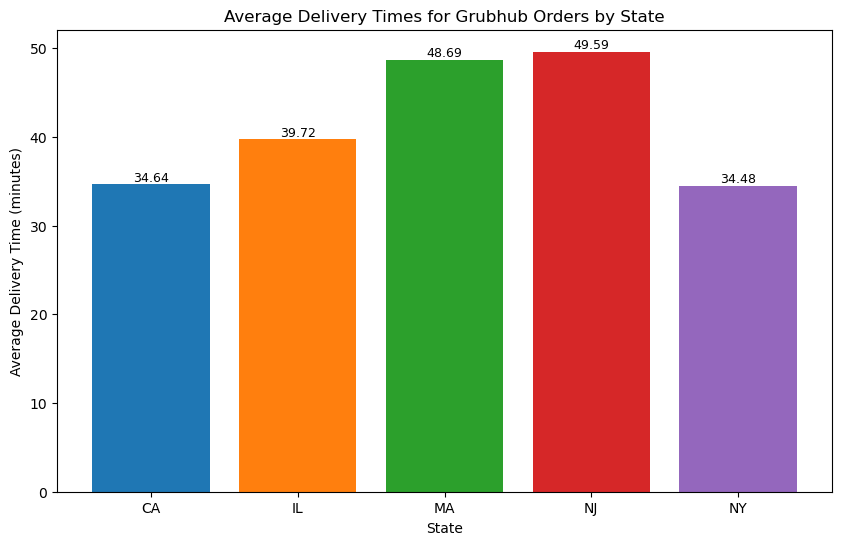

In [8]:
# State colors
state_colors = {
    'CA': '#1f77b4',  # blue
    'IL': '#ff7f0e',  # orange
    'MA': '#2ca02c',  # green
    'NJ': '#d62728',  # red
    'NY': '#9467bd'   # purple
}

# Created a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(average_grubhub_delivery_times.index, average_grubhub_delivery_times.values, 
               color=[state_colors[state] for state in average_grubhub_delivery_times.index])
plt.title('Average Delivery Times for Grubhub Orders by State')
plt.xlabel('State')
plt.ylabel('Average Delivery Time (minutes)')

# Added data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=9)

plt.show()

Normality test for NY: Statistic=0.958794116973877, p-value=2.2250726812989108e-22
Normality test for NJ: Statistic=0.8685900568962097, p-value=2.0755714480995738e-21
Normality test for CA: Statistic=0.9427456855773926, p-value=4.7773454285507926e-23
Normality test for IL: Statistic=0.8525696992874146, p-value=8.392205297800152e-36
Normality test for MA: Statistic=0.9641342759132385, p-value=2.5532019261396283e-14
ANOVA Result: F-statistic=491.5327180683338, p-value=0.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


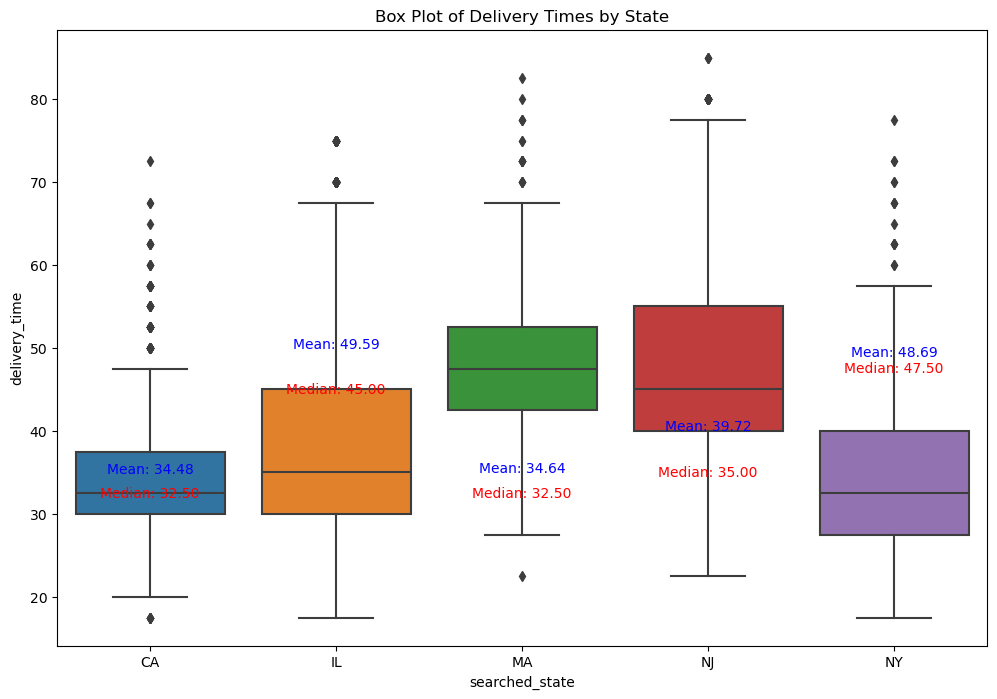

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

# Filtered data for only Grubhub deliveries in the df dataframe
grubhub_deliveries = df[df['delivery_type'] == 'GRUBHUB']

# Performed Shapiro-Wilk test for normality
normality_results = {state: stats.shapiro(grubhub_deliveries[grubhub_deliveries['searched_state'] == state]['delivery_time'])
                     for state in grubhub_deliveries['searched_state'].unique()}

# Display normality test results
for state, result in normality_results.items():
    print(f"Normality test for {state}: Statistic={result[0]}, p-value={result[1]}")

# Performed ANOVA
anova_result = stats.f_oneway(*[grubhub_deliveries[grubhub_deliveries['searched_state'] == state]['delivery_time'] 
                                for state in grubhub_deliveries['searched_state'].unique()])

print(f"ANOVA Result: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}")

# Created a box plot with mean and median
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='searched_state', y='delivery_time', data=grubhub_deliveries, showfliers=True)
plt.title('Box Plot of Delivery Times by State')
for i, state in enumerate(grubhub_deliveries['searched_state'].unique()):
    state_data = grubhub_deliveries[grubhub_deliveries['searched_state'] == state]['delivery_time']
    mean = state_data.mean()
    median = state_data.median()
    plt.text(i, mean, f'Mean: {mean:.2f}', color='blue', ha='center', va='bottom')
    plt.text(i, median, f'Median: {median:.2f}', color='red', ha='center', va= 'center')

plt.show()


/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/525537537.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_grubhub_times = grubhub_deliveries.groupby('searched_state')['delivery_time'].mean()
/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/525537537.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_self_times = self_deliveries.groupby('searched_state')['delivery_time'].mean()


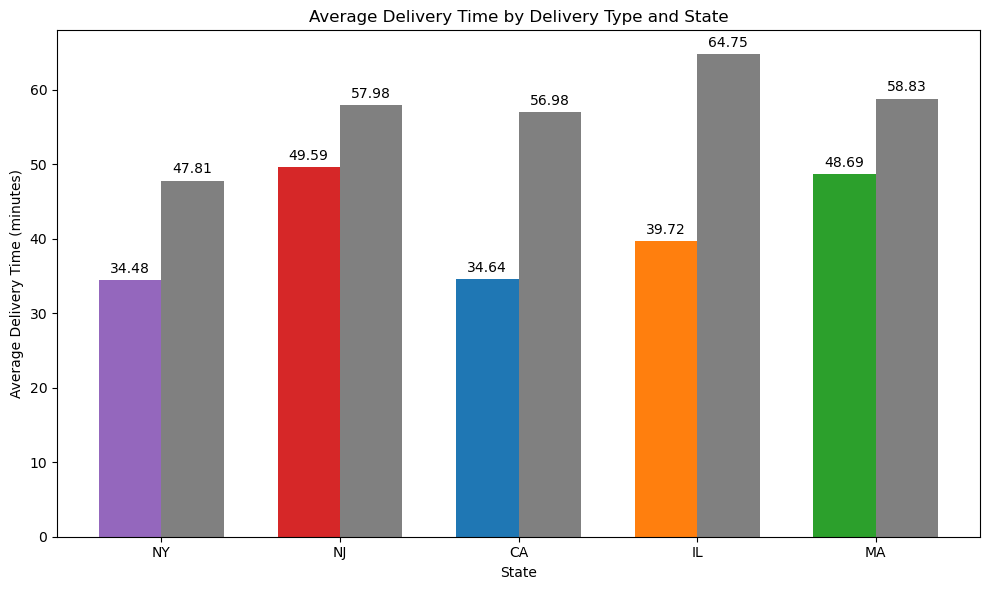

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation: Filter data for Grubhub and Self deliveries and calculate their average delivery times
grubhub_deliveries = df[df['delivery_type'] == 'GRUBHUB']
self_deliveries = df[df['delivery_type'] == 'SELF']

average_grubhub_times = grubhub_deliveries.groupby('searched_state')['delivery_time'].mean()
average_self_times = self_deliveries.groupby('searched_state')['delivery_time'].mean()

# State colors
state_colors = {
    'CA': '#1f77b4',  # blue
    'IL': '#ff7f0e',  # orange
    'MA': '#2ca02c',  # green
    'NJ': '#d62728',  # red
    'NY': '#9467bd'   # purple
}

# Ensured both series are indexed the same for consistent plotting
states = df['searched_state'].unique()
average_grubhub_times = average_grubhub_times.reindex(states)
average_self_times = average_self_times.reindex(states)

# Bar plot setup
x = np.arange(len(states))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, average_grubhub_times, width, label='Grubhub', color=[state_colors[state] for state in states])
rects2 = ax.bar(x + width/2, average_self_times, width, label='Self', color='grey')

# Added some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('State')
ax.set_ylabel('Average Delivery Time (minutes)')
ax.set_title('Average Delivery Time by Delivery Type and State')
ax.set_xticks(x)
ax.set_xticklabels(states)


def autolabel(rects):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


In [12]:
from scipy.stats import mannwhitneyu

# Split the data by delivery type
grubhub_deliveries = df[df['delivery_type'] == 'GRUBHUB']['delivery_time']
self_deliveries = df[df['delivery_type'] == 'SELF']['delivery_time']

# Performed the Mann-Whitney U Test
mwu_result = mannwhitneyu(grubhub_deliveries, self_deliveries, alternative='two-sided')
print("Mann-Whitney U Test Result:", mwu_result)

Mann-Whitney U Test Result: MannwhitneyuResult(statistic=2467130.5, pvalue=9.780206123303118e-289)


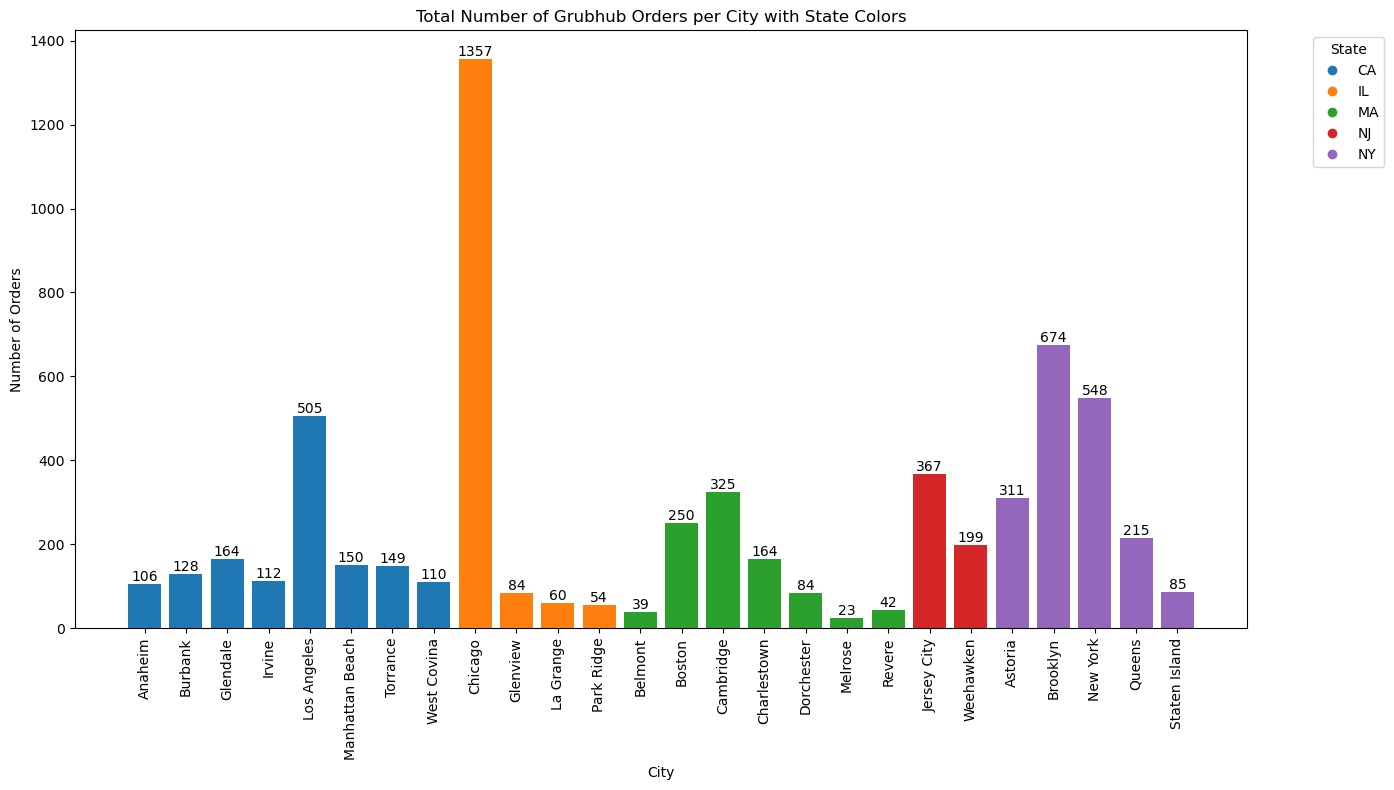

In [13]:
import matplotlib.pyplot as plt


# Converted categorical data to strings if needed
df['searched_state'] = df['searched_state'].astype(str)
df['searched_city'] = df['searched_city'].astype(str)

# Filter data for only Grubhub deliveries
grubhub_deliveries = df[df['delivery_type'] == 'GRUBHUB']

# Count orders per city within each state
orders_per_city_state = grubhub_deliveries.groupby(['searched_state', 'searched_city']).size().reset_index(name='order_count')

# Sort the data by state and then by order count within each state for better visualization
orders_per_city_state.sort_values(by=['searched_state', 'searched_city'], inplace=True)

# State colors
state_colors = {
    'CA': '#1f77b4',  # blue
    'IL': '#ff7f0e',  # orange
    'MA': '#2ca02c',  # green
    'NJ': '#d62728',  # red
    'NY': '#9467bd'   # purple
}

# Map the state to each city for coloring
orders_per_city_state['color'] = orders_per_city_state['searched_state'].map(state_colors)

# Created the bar plot
plt.figure(figsize=(14, 8))
bars = plt.bar(orders_per_city_state['searched_city'], orders_per_city_state['order_count'], color=orders_per_city_state['color'])

# Created legend handles manually
legend_handles = [plt.Line2D([0], [0], color=color, label=state, marker='o', linestyle='') for state, color in state_colors.items()]

# Added labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

# Customized the plot
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Total Number of Grubhub Orders per City with State Colors')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.legend(handles=legend_handles, title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()


      searched_city searched_state  delivery_time
0           Anaheim             CA      33.254717
5           Burbank             CA      31.835938
10         Glendale             CA      32.728659
12           Irvine             CA      35.446429
15      Los Angeles             CA      35.391089
16  Manhattan Beach             CA      36.183333
23         Torrance             CA      35.587248
25      West Covina             CA      34.431818
8           Chicago             IL      39.701548
11         Glenview             IL      39.583333
14        La Grange             IL      39.666667
19       Park Ridge             IL      40.555556
2           Belmont             MA      45.705128
3            Boston             MA      49.930000
6         Cambridge             MA      48.376923
7       Charlestown             MA      49.664634
9        Dorchester             MA      47.976190
17          Melrose             MA      47.065217
21           Revere             MA      45.119048


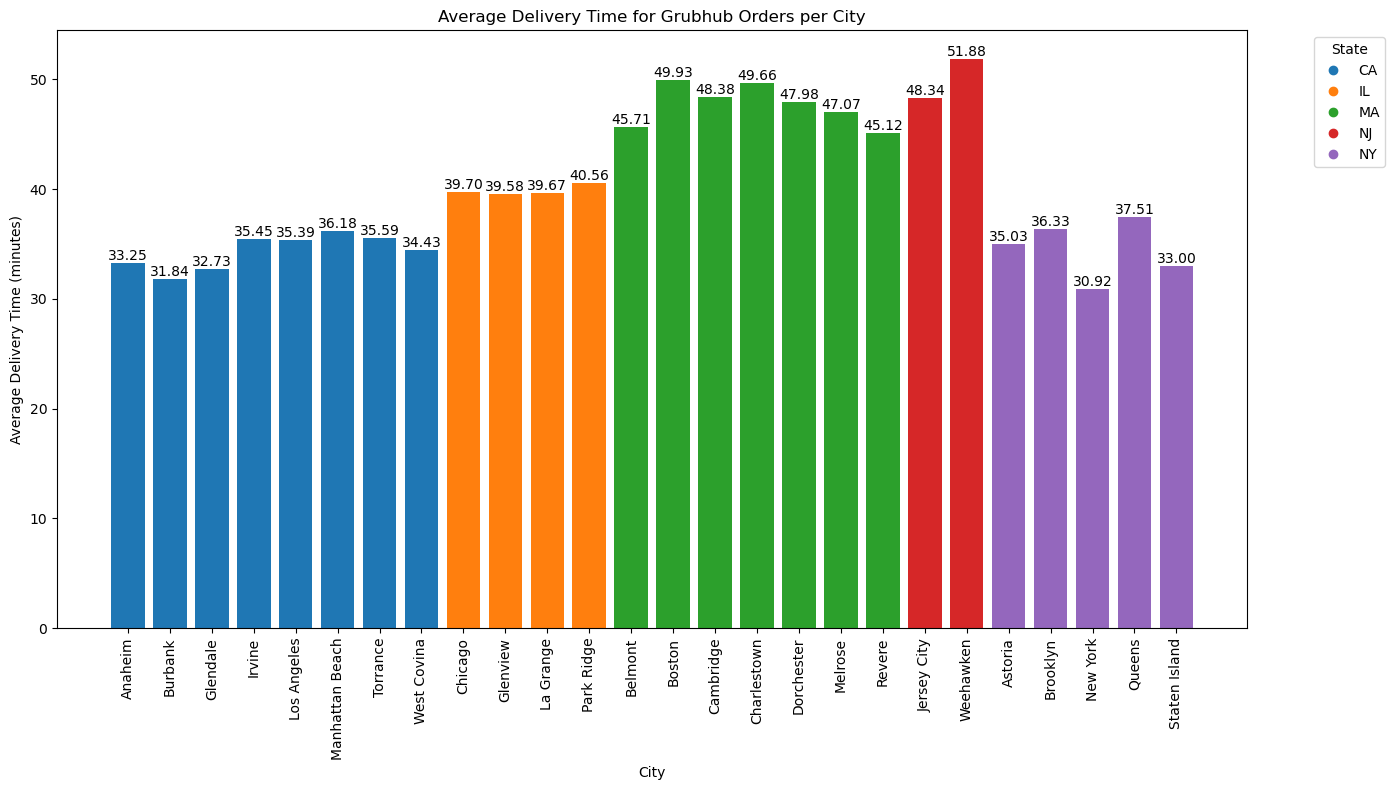

In [14]:
import matplotlib.pyplot as plt
import pandas as pd


# Filtered data for only Grubhub deliveries
grubhub_deliveries = df[df['delivery_type'] == 'GRUBHUB']

# Calculated the average delivery time per city for Grubhub deliveries
average_delivery_times = grubhub_deliveries.groupby(['searched_city', 'searched_state'])['delivery_time'].mean().reset_index()

# Sorted the data by state and then city for a consistent layout
average_delivery_times.sort_values(by=['searched_state', 'searched_city'], inplace=True)
print(average_delivery_times )

# State colors
state_colors = {
    'CA': '#1f77b4',  # blue
    'IL': '#ff7f0e',  # orange
    'MA': '#2ca02c',  # green
    'NJ': '#d62728',  # red
    'NY': '#9467bd'   # purple
}

# Map the state to each city for coloring
average_delivery_times['color'] = average_delivery_times['searched_state'].map(state_colors)

# Created the bar plot
plt.figure(figsize=(14, 8))
bars = plt.bar(average_delivery_times['searched_city'], average_delivery_times['delivery_time'], color=average_delivery_times['color'])

# Created legend handles manually
legend_handles = [plt.Line2D([0], [0], color=color, label=state, marker='o', linestyle='') for state, color in state_colors.items()]

# Added labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Customized the plot
plt.xlabel('City')
plt.ylabel('Average Delivery Time (minutes)')
plt.title('Average Delivery Time for Grubhub Orders per City')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.legend(handles=legend_handles, title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()


      searched_city searched_state  delivery_time_city  delivery_time_state
0           Anaheim             CA           33.254717            34.640098
1           Burbank             CA           31.835938            34.640098
2          Glendale             CA           32.728659            34.640098
3            Irvine             CA           35.446429            34.640098
4       Los Angeles             CA           35.391089            34.640098
5   Manhattan Beach             CA           36.183333            34.640098
6          Torrance             CA           35.587248            34.640098
7       West Covina             CA           34.431818            34.640098
8           Astoria             NY           35.032154            34.477632
9          Brooklyn             NY           36.331602            34.477632
10         New York             NY           30.921533            34.477632
11           Queens             NY           37.511628            34.477632
12    Staten

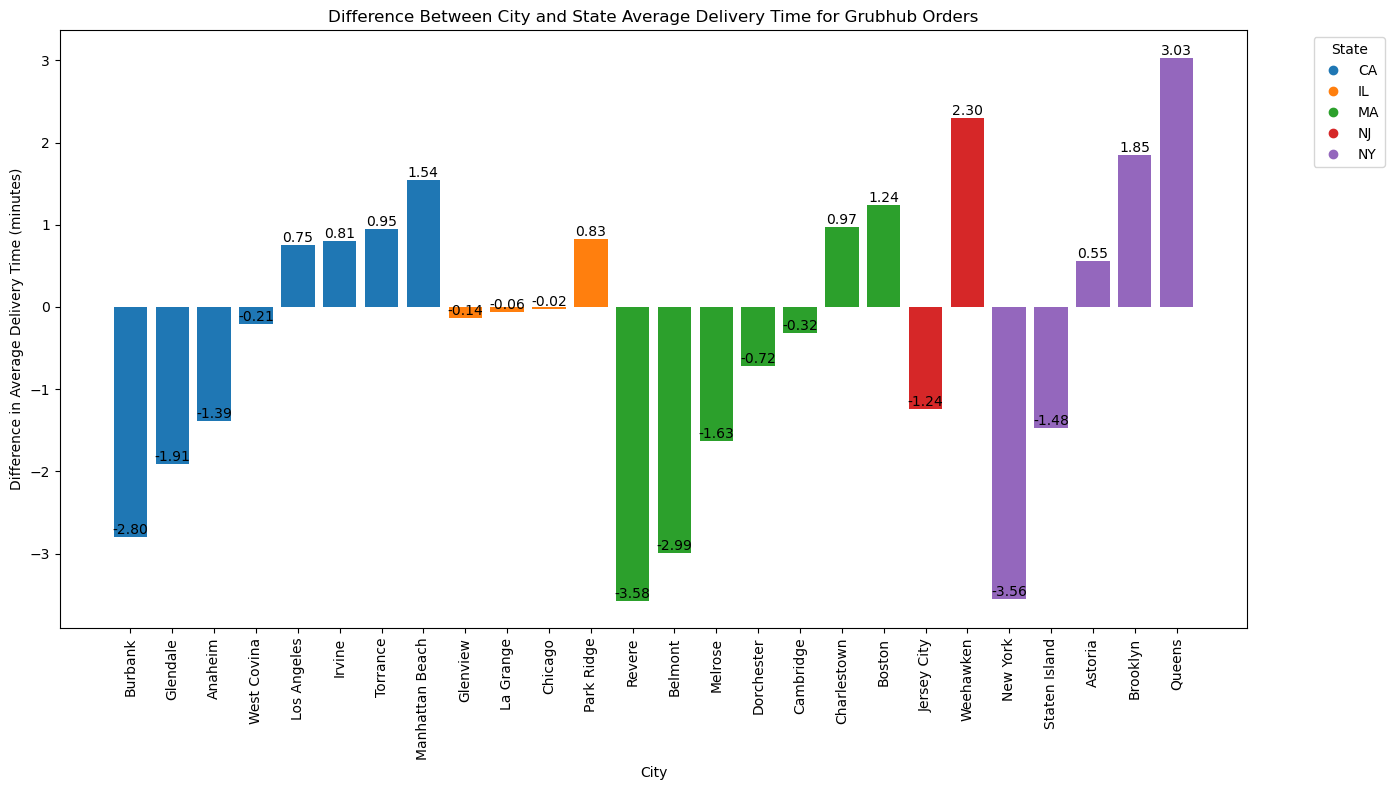

In [15]:
import matplotlib.pyplot as plt
import pandas as pd



# Filtered data for only Grubhub deliveries
grubhub_deliveries = df[df['delivery_type'] == 'GRUBHUB']

# Calculated the average delivery time per city for Grubhub deliveries
city_avg_delivery_times = grubhub_deliveries.groupby(['searched_city', 'searched_state'])['delivery_time'].mean().reset_index()

# Calculated the average delivery time per state for Grubhub deliveries
state_avg_delivery_times = grubhub_deliveries.groupby('searched_state')['delivery_time'].mean().reset_index()

# Merged the city and state averages
merged_avg_delivery_times = pd.merge(city_avg_delivery_times, state_avg_delivery_times, on='searched_state', suffixes=('_city', '_state'))
print(merged_avg_delivery_times)

# Calculated the difference between city average and state average
merged_avg_delivery_times['difference'] = merged_avg_delivery_times['delivery_time_city'] - merged_avg_delivery_times['delivery_time_state']
print(merged_avg_delivery_times['difference'])
# Sort the data by state and then by the difference for a consistent layout
merged_avg_delivery_times.sort_values(by=['searched_state', 'difference'], inplace=True)

# State colors
state_colors = {
    'CA': '#1f77b4',  # blue
    'IL': '#ff7f0e',  # orange
    'MA': '#2ca02c',  # green
    'NJ': '#d62728',  # red
    'NY': '#9467bd'   # purple
}

# Map the state to each city for coloring
merged_avg_delivery_times['color'] = merged_avg_delivery_times['searched_state'].map(state_colors)

# Created the bar plot for the difference
plt.figure(figsize=(14, 8))
bars = plt.bar(merged_avg_delivery_times['searched_city'], merged_avg_delivery_times['difference'], color=merged_avg_delivery_times['color'])

# Created legend handles manually
legend_handles = [plt.Line2D([0], [0], color=color, label=state, marker='o', linestyle='') for state, color in state_colors.items()]

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Customized the plot
plt.xlabel('City')
plt.ylabel('Difference in Average Delivery Time (minutes)')
plt.title('Difference Between City and State Average Delivery Time for Grubhub Orders')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.legend(handles=legend_handles, title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()


In [16]:
import pandas as pd
from scipy.stats import kruskal

# Get all unique states in the dataset
states = df['searched_state'].unique()

# Dictionary to store Kruskal-Wallis test results for each state
kruskal_results = {}

for state in states:
    # Filter data for the current state
    state_data = df[df['searched_state'] == state]
    # Get unique cities within the state
    state_cities = state_data['searched_city'].unique()
    # Prepare data for Kruskal-Wallis test
    city_groups = [state_data[state_data['searched_city'] == city]['delivery_time'] for city in state_cities]
    # Check if there are at least two groups to compare
    if len(city_groups) > 1:
        test_result = kruskal(*city_groups)
        kruskal_results[state] = {
            'Statistic': test_result.statistic,
            'P-value': test_result.pvalue,
            'Cities': len(state_cities)
        }

# Displayed the Kruskal-Wallis test results for each state
for state, result in kruskal_results.items():
    print(f"State: {state}, Statistic: {result['Statistic']}, P-value: {result['P-value']}, Number of Cities: {result['Cities']}")


State: NY, Statistic: 115.04470916309482, P-value: 6.10492889908716e-24, Number of Cities: 5
State: NJ, Statistic: 1.5738859533254508, P-value: 0.2096435753518701, Number of Cities: 2
State: CA, Statistic: 34.68267251340531, P-value: 1.2829536319095573e-05, Number of Cities: 8
State: IL, Statistic: 6.521703428377085, P-value: 0.08881049289250308, Number of Cities: 4
State: MA, Statistic: 18.89585999905035, P-value: 0.004343172473765343, Number of Cities: 7


In [ ]:
import pandas as pd
import scikit_posthocs as sp

# Loaded the dataset
df = pd.read_excel('/Users/madhusudhanunnava/Desktop/grub hub.xlsx', sheet_name='grubhub')

# Listed of states to analyze based on previous significant Kruskal-Wallis results
states_to_analyze = ['NY', 'CA', 'MA', 'IL', 'NJ']  # Add other states as necessary

# Dictionary to store post-hoc results
post_hoc_results = {}

for state in states_to_analyze:
    # Filter data for the current state
    state_data = df[df['searched_state'] == state]
    
    # Perform Dunn's test with Bonferroni correction for multiple comparisons
    results = sp.posthoc_dunn(state_data, val_col='delivery_time', group_col='searched_city', p_adjust='bonferroni')
    
    # Store the results in the dictionary
    post_hoc_results[state] = results

# Print the results for all analyzed states
for state, result in post_hoc_results.items():
    print(f"Post-hoc results for {state}:")
    print(result)
    print("\n")


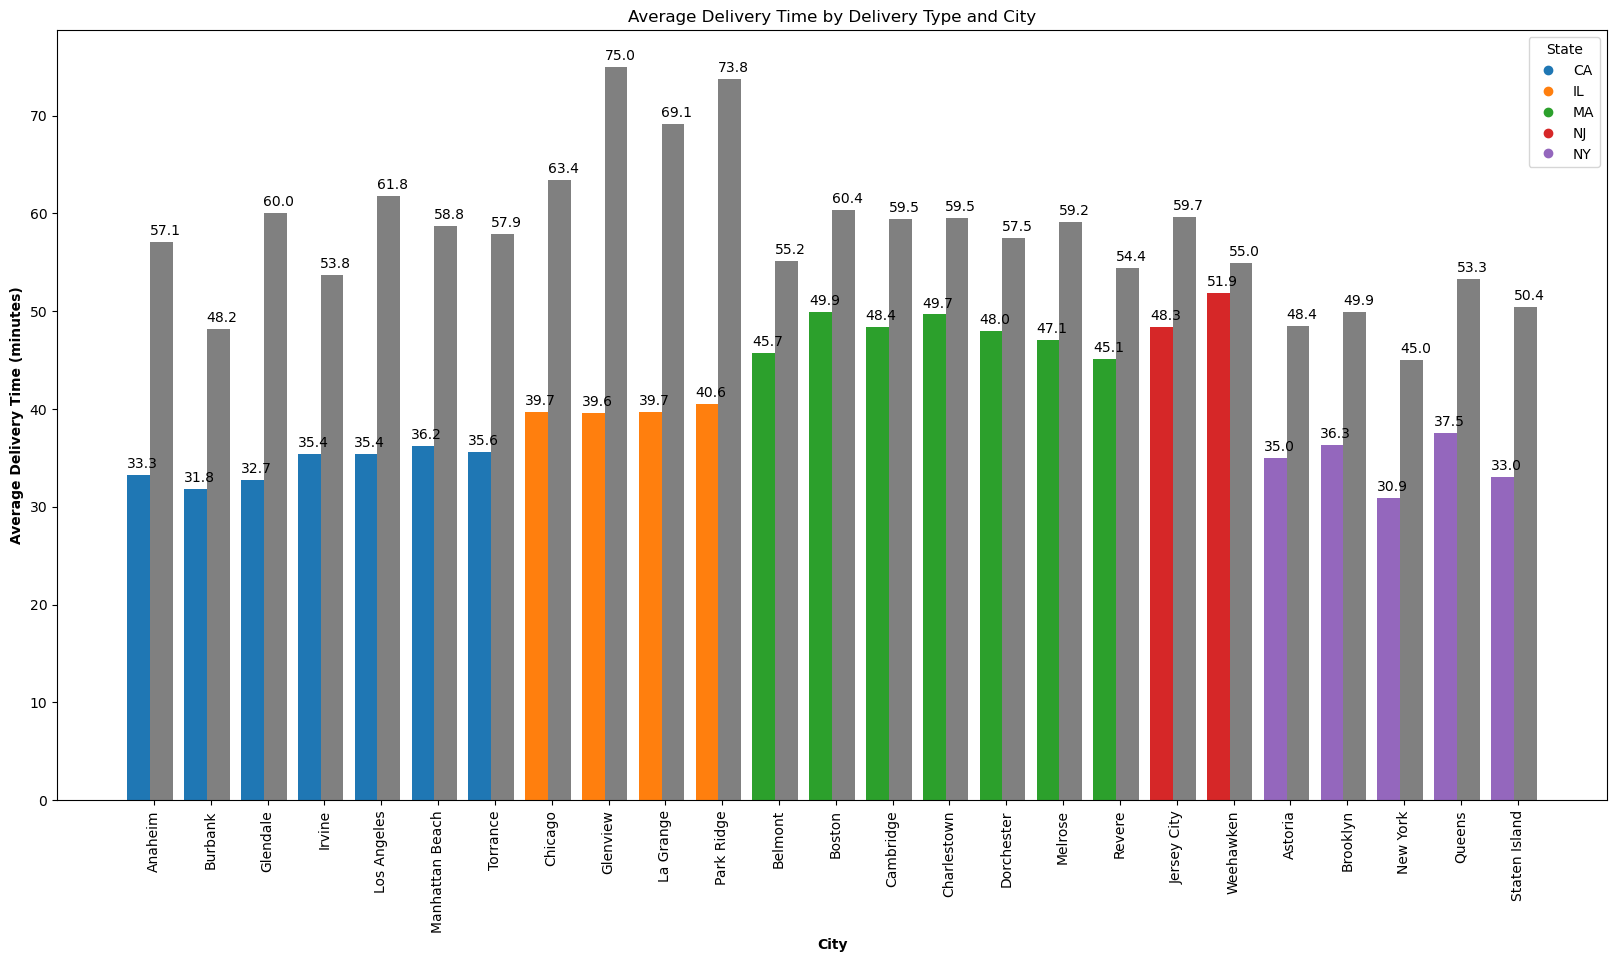

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Filtered data for only Grubhub and Self deliveries
grubhub_deliveries = df[df['delivery_type'] == 'GRUBHUB']
self_deliveries = df[df['delivery_type'] == 'SELF']

# Calculated the average delivery time per city for Grubhub deliveries
city_avg_grubhub = grubhub_deliveries.groupby(['searched_city', 'searched_state'])['delivery_time'].mean().reset_index()

# Calculated the average delivery time per city for Self deliveries
city_avg_self = self_deliveries.groupby(['searched_city', 'searched_state'])['delivery_time'].mean().reset_index()

# Merged the two datasets on city and state
merged_city_avg = pd.merge(city_avg_grubhub, city_avg_self, on=['searched_city', 'searched_state'], suffixes=('_grubhub', '_self'))

# Ensured that the merged data is sorted by state and then by city
merged_city_avg.sort_values(by=['searched_state', 'searched_city'], inplace=True)

# State colors
state_colors = {
    'CA': '#1f77b4',  # blue
    'IL': '#ff7f0e',  # orange
    'MA': '#2ca02c',  # green
    'NJ': '#d62728',  # red
    'NY': '#9467bd'   # purple
}

# Assigned color to each city based on its state
merged_city_avg['color'] = merged_city_avg['searched_state'].map(state_colors)

# Start plotting
fig, ax = plt.subplots(figsize=(20, 10))

# Set the width of the bars
bar_width = 0.40

# Set position of bar on X axis
r1 = np.arange(len(merged_city_avg))
r2 = [x + bar_width for x in r1]

# Make the plot
bars1 = ax.bar(r1, merged_city_avg['delivery_time_grubhub'], color=merged_city_avg['color'], width=bar_width, label='Grubhub')
bars2 = ax.bar(r2, merged_city_avg['delivery_time_self'], color='grey', width=bar_width, label='Self')

# Add labels on top of the bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate('{}'.format(round(height, 1)),
                xy=(bar.get_x() + bar.get_width() / 1.5, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add xticks on the middle of the group bars
ax.set_xlabel('City', fontweight='bold')
ax.set_ylabel('Average Delivery Time (minutes)', fontweight='bold')
ax.set_title('Average Delivery Time by Delivery Type and City')
ax.set_xticks([r + bar_width / 1.5 for r in range(len(r1))])
ax.set_xticklabels(merged_city_avg['searched_city'], rotation=90)

# Created legend & Show graphic
legend_handles = [plt.Line2D([0], [0], color=color, label=state, marker='o', linestyle='') for state, color in state_colors.items()]
ax.legend(handles=legend_handles, title='State')

plt.show()



In [18]:
import pandas as pd
import scipy.stats as stats

# Filter out rows where either Grubhub or restaurant delivery times are missing
df = df.dropna(subset=['delivery_time'])

# Separate the data into two groups: Grubhub and Restaurant
grubhub_deliveries = df[df['delivery_type'] == 'GRUBHUB']
restaurant_deliveries = df[df['delivery_type'] == 'SELF']

# Ensure each group only contains cities present in both datasets
common_cities = set(grubhub_deliveries['searched_city']).intersection(restaurant_deliveries['searched_city'])
grubhub_deliveries = grubhub_deliveries[grubhub_deliveries['searched_city'].isin(common_cities)]
restaurant_deliveries = restaurant_deliveries[restaurant_deliveries['searched_city'].isin(common_cities)]

# Merge the datasets on city for a paired comparison
merged_deliveries = pd.merge(grubhub_deliveries, restaurant_deliveries, on='searched_city', suffixes=('_gh', '_rest'))

# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(merged_deliveries['delivery_time_gh'], merged_deliveries['delivery_time_rest'])

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -1003.0932028314596
P-value: 0.0


In [19]:
#Research Question 2

print(df['is_gh'].value_counts())

is_gh
True    8088
Name: count, dtype: int64


In [20]:
import pandas as pd

# Specify the file path and sheet name
file_path = '/Users/madhusudhanunnava/Desktop/grub hub.xlsx'
sheet_name = 'grubhub'


# Print the unique values in the 'is_gh' column
unique_values = df['is_gh'].unique()
print(unique_values)


[ True]


In [21]:
import pandas as pd

df = pd.read_excel('/Users/madhusudhanunnava/Desktop/grub hub.xlsx', sheet_name='grubhub')  # Update the path and sheet name accordingly

# Count the number of orders for subscribers ('Yes') and non-subscribers ('No')
order_frequency = df['is_gh'].value_counts()

print(order_frequency)


is_gh
Yes    7857
No      231
Name: count, dtype: int64


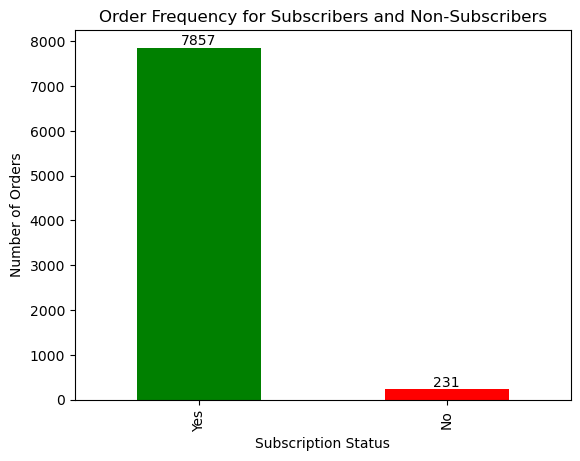

In [22]:
import matplotlib.pyplot as plt


# Count the number of orders for subscribers ('Yes') and non-subscribers ('No')
order_frequency = df['is_gh'].value_counts()

# Plot the order frequency for subscribers and non-subscribers
order_frequency.plot(kind='bar', color=['green', 'red'])

# Add title and labels
plt.title('Order Frequency for Subscribers and Non-Subscribers')
plt.xlabel('Subscription Status')
plt.ylabel('Number of Orders')

# Add value labels on top of the bars
for index, value in enumerate(order_frequency):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


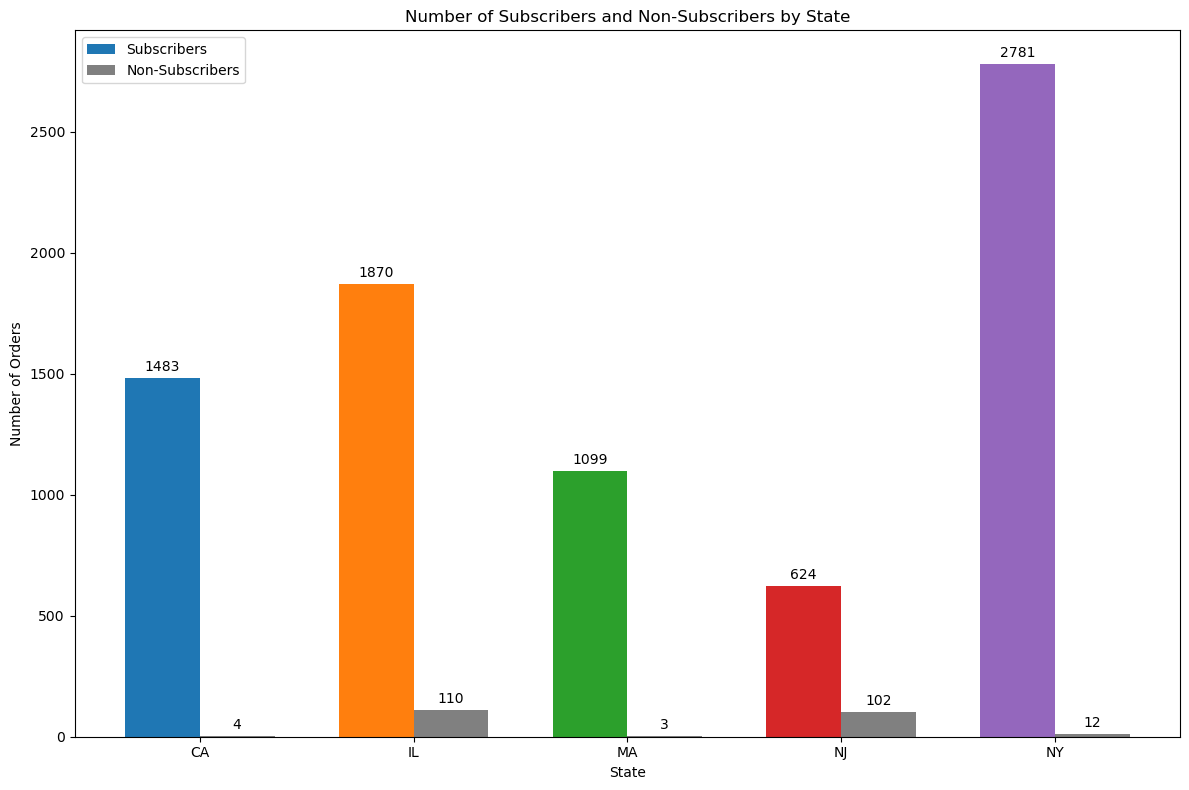

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Group by state and subscription status ('is_gh') and count the entries
subscriber_counts_by_state = df.groupby(['searched_state', 'is_gh']).size().unstack(fill_value=0)

# State colors for subscribers
state_colors = {
    'CA': '#1f77b4',  # blue
    'IL': '#ff7f0e',  # orange
    'MA': '#2ca02c',  # green
    'NJ': '#d62728',  # red
    'NY': '#9467bd'   # purple
}

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(subscriber_counts_by_state))

# Plot subscribers
bars1 = ax.bar(index, subscriber_counts_by_state['Yes'], bar_width, label='Subscribers', color=[state_colors[state] for state in subscriber_counts_by_state.index])

# Plot non-subscribers
bars2 = ax.bar(index + bar_width, subscriber_counts_by_state['No'], bar_width, label='Non-Subscribers', color='grey')

# Add labels to the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Set titles and labels
ax.set_xlabel('State')
ax.set_ylabel('Number of Orders')
ax.set_title('Number of Subscribers and Non-Subscribers by State')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(subscriber_counts_by_state.index)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


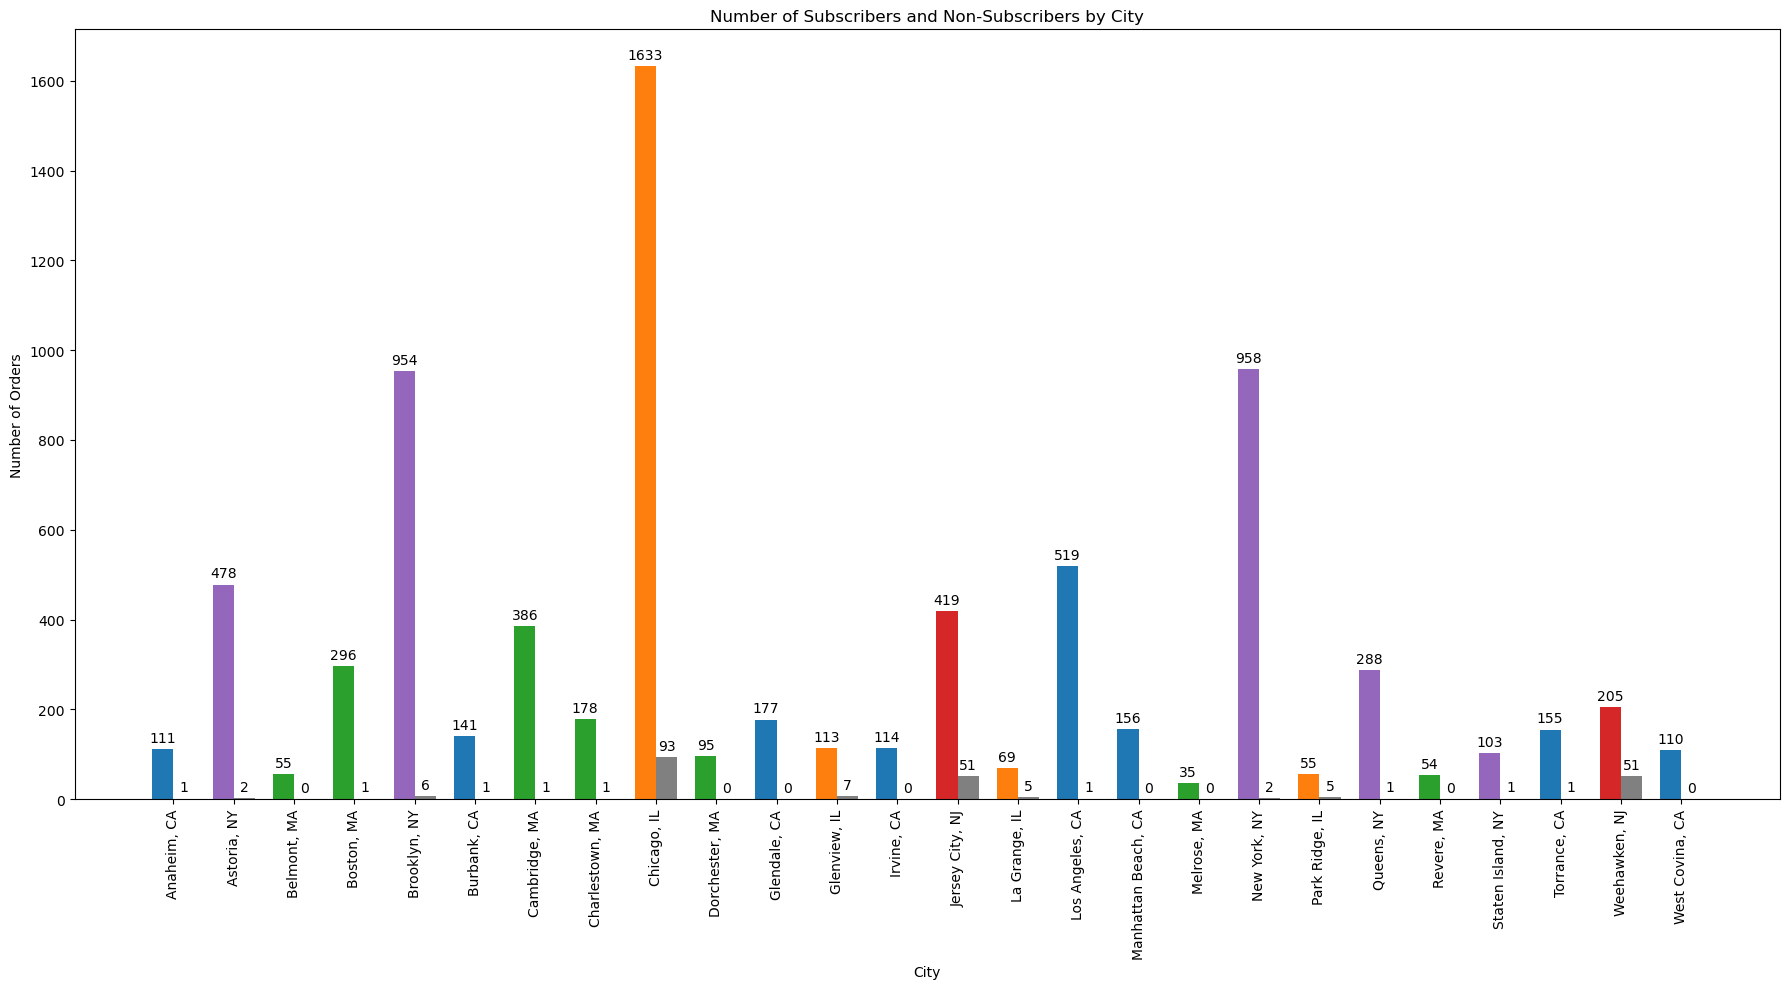

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Group by city, state, and subscription status ('is_gh') and count the entries
subscriber_counts_by_city = df.groupby(['searched_city', 'searched_state', 'is_gh']).size().unstack(fill_value=0)

# State colors for subscribers
state_colors = {
    'CA': '#1f77b4',  # blue
    'IL': '#ff7f0e',  # orange
    'MA': '#2ca02c',  # green
    'NJ': '#d62728',  # red
    'NY': '#9467bd'   # purple
}

# Get the state for each city to determine the color
subscriber_counts_by_city['state_color'] = subscriber_counts_by_city.index.get_level_values('searched_state').map(state_colors)

# Plot the data
fig, ax = plt.subplots(figsize=(18, 10))
bar_width = 0.35
index = np.arange(len(subscriber_counts_by_city))

# Plot subscribers
bars1 = ax.bar(index, subscriber_counts_by_city['Yes'], bar_width, label='Subscribers', color=subscriber_counts_by_city['state_color'])

# Plot non-subscribers
bars2 = ax.bar(index + bar_width, subscriber_counts_by_city['No'], bar_width, label='Non-Subscribers', color='grey')

# Add labels to the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Set titles and labels
ax.set_xlabel('City')
ax.set_ylabel('Number of Orders')
ax.set_title('Number of Subscribers and Non-Subscribers by City')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([f"{x[0]}, {x[1]}" for x in subscriber_counts_by_city.index], rotation=90)


plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['searched_city'], df['is_gh'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 553.9502369627229
P-value: 4.8020425077815204e-101


In [26]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Create a binary indicator where 'Yes' subscribers are 1 and non-subscribers are 0
df['subscriber'] = (df['is_gh'] == 'Yes').astype(int)

# If analyzing by city or other variable, include it in the groupby
# For instance, if analyzing overall:
order_counts_subscribers = df[df['subscriber'] == 1].groupby('searched_city').size()
order_counts_non_subscribers = df[df['subscriber'] == 0].groupby('searched_city').size()

# Ensure both series have the same cities
common_cities = order_counts_subscribers.index.intersection(order_counts_non_subscribers.index)
order_counts_subscribers = order_counts_subscribers[common_cities]
order_counts_non_subscribers = order_counts_non_subscribers[common_cities]

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(order_counts_subscribers, order_counts_non_subscribers, alternative='two-sided')

print("Mann-Whitney U statistic =", u_statistic)
print("P-value =", p_value)


Mann-Whitney U statistic = 322.0
P-value = 3.6419495108342755e-07


In [27]:
#Reserach question 3
cuisine_counts = df.groupby(['searched_state', 'Cuisine']).size().reset_index(name='order_count')

# Display the result to verify the aggregation
print(cuisine_counts.head())


  searched_state        Cuisine  order_count
0             CA       American          629
1             CA          Asian          227
2             CA        British            2
3             CA  Café/Desserts          117
4             CA      Ethiopian            1


In [28]:
top_cuisines = cuisine_counts.sort_values(by=['searched_state', 'order_count'], ascending=[True, False])
top_5_cuisines_per_state = top_cuisines.groupby('searched_state').head(5)

# Display the top 5 cuisines for each state to verify correctness
print(top_5_cuisines_per_state)

   searched_state        Cuisine  order_count
0              CA       American          629
14             CA        Mexican          243
1              CA          Asian          227
3              CA  Café/Desserts          117
15             CA         Salads           70
19             IL       American          835
20             IL          Asian          277
32             IL        Mexican          259
24             IL   Global/Other          150
21             IL  Café/Desserts          106
38             MA       American          392
39             MA          Asian          228
51             MA        Mexican          104
47             MA        Italian           95
40             MA  Café/Desserts           71
56             NJ       American          285
57             NJ          Asian           73
63             NJ         Indian           73
68             NJ        Mexican           72
61             NJ   Global/Other           69
72             NY       American  

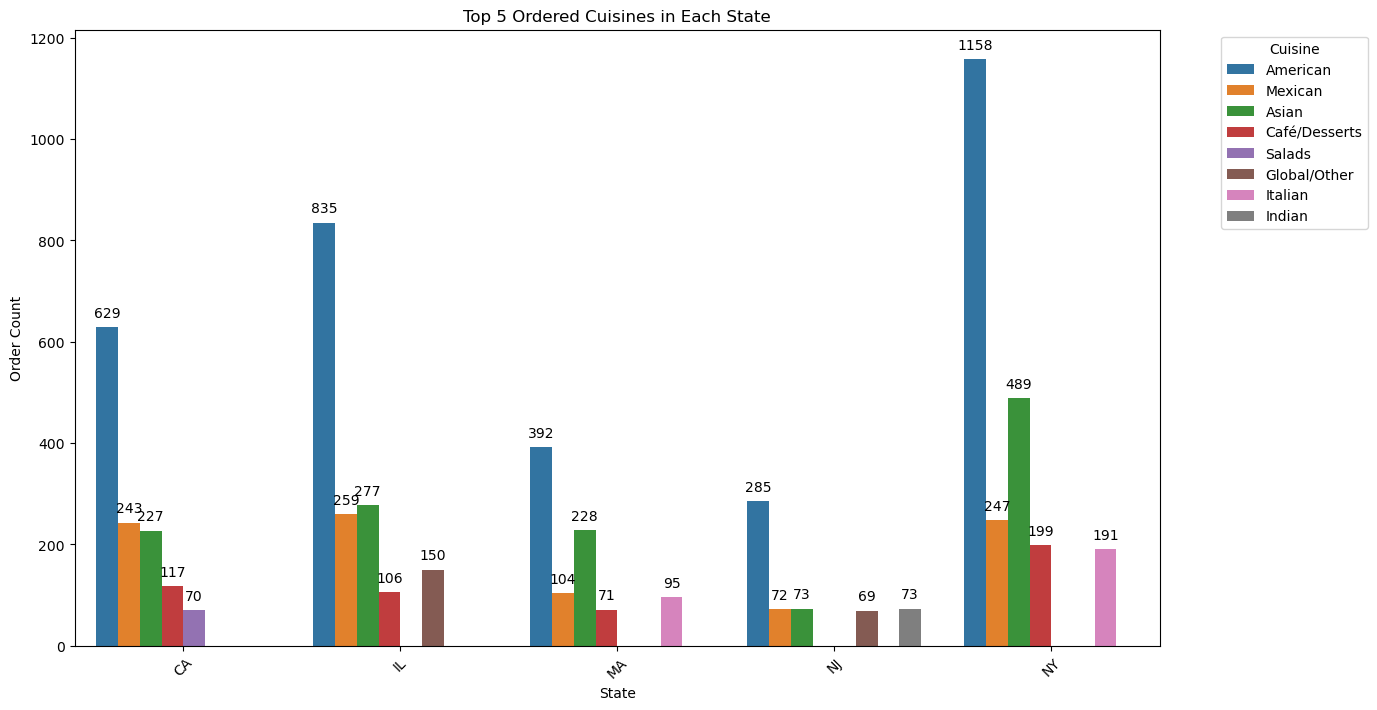

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=top_5_cuisines_per_state, x='searched_state', y='order_count', hue='Cuisine')
plt.title('Top 5 Ordered Cuisines in Each State')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate state labels for better readability

# Add labels above each bar
for p in bar_plot.patches:
    height = p.get_height()
    # Check if height is NaN and only annotate if it is not
    if not pd.isna(height):
        bar_plot.annotate(f'{int(height)}',  # convert height to an integer to avoid decimals
                          (p.get_x() + p.get_width() / 2, height),  # position for the label (center of the bar, at the top)
                          ha='center',  # center alignment
                          va='bottom',  # bottom vertical alignment makes it appear above the bar
                          textcoords="offset points",
                          xytext=(0, 5))  # 5 points vertical offset

plt.show()


In [30]:
#Research Question 4
print(df[['delivery_time', 'review_rating', 'service_fee', 'delivery_fee', 'delivery_type']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8088 entries, 0 to 8087
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  8088 non-null   float64
 1   review_rating  8088 non-null   float64
 2   service_fee    8088 non-null   float64
 3   delivery_fee   8088 non-null   float64
 4   delivery_type  8088 non-null   object 
dtypes: float64(4), object(1)
memory usage: 316.1+ KB
None


In [31]:
df.dropna(subset=['delivery_time', 'review_rating', 'service_fee', 'delivery_fee'], inplace=True)

# Convert types if necessary
df['review_rating'] = pd.to_numeric(df['review_rating'], errors='coerce')
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

In [32]:
correlation_matrix = df[['delivery_time', 'review_rating']].corr()
print(correlation_matrix)

               delivery_time  review_rating
delivery_time       1.000000      -0.004313
review_rating      -0.004313       1.000000


/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/3160060130.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_time_bin = df_cleaned.groupby('time_bin')['review_rating'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


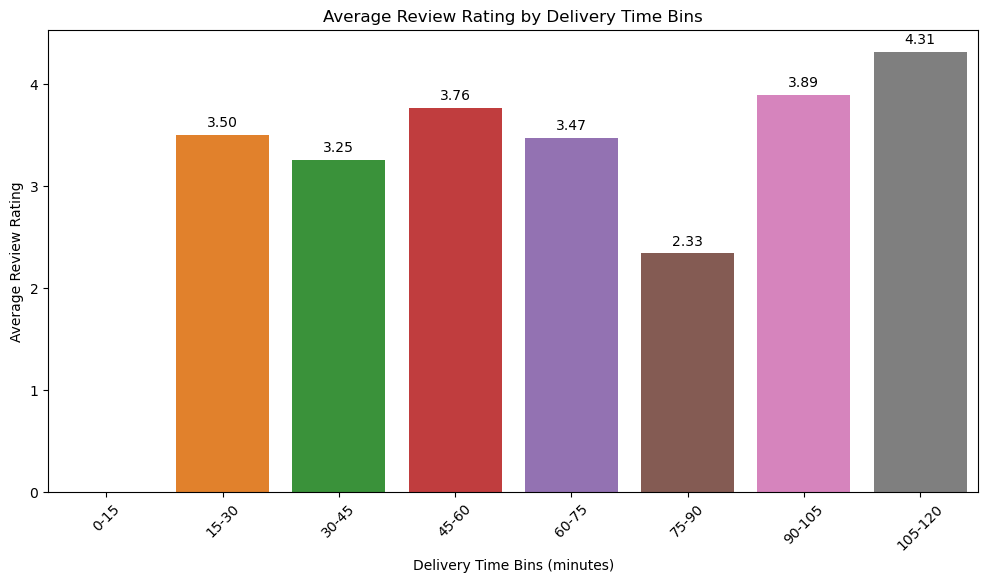

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Let's create 'df_cleaned' as a cleaned version of 'df'.
df_cleaned = df.copy()

# Make sure to handle NaN values or convert data types if necessary:
df_cleaned['delivery_time'] = pd.to_numeric(df_cleaned['delivery_time'], errors='coerce')
df_cleaned['review_rating'] = pd.to_numeric(df_cleaned['review_rating'], errors='coerce')

# Drop rows where 'delivery_time' or 'review_rating' could not be converted or are NaN
df_cleaned.dropna(subset=['delivery_time', 'review_rating'], inplace=True)

# Define bins and labels for categorizing 'delivery_time'
bins = [0, 15, 30, 45, 60, 75, 90, 105, 120]  # Adjust this based on your data's range and needs
labels = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90', '90-105', '105-120']

# Create a new column 'time_bin' for categorized delivery times
df_cleaned['time_bin'] = pd.cut(df_cleaned['delivery_time'], bins=bins, labels=labels, right=False)

# Calculate average ratings for each time bin
rating_by_time_bin = df_cleaned.groupby('time_bin')['review_rating'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=rating_by_time_bin, x='time_bin', y='review_rating')
plt.title('Average Review Rating by Delivery Time Bins')
plt.xlabel('Delivery Time Bins (minutes)')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45)

# Add data labels above each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.show()


/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/3412389506.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('Time_Bin')['review_rating'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


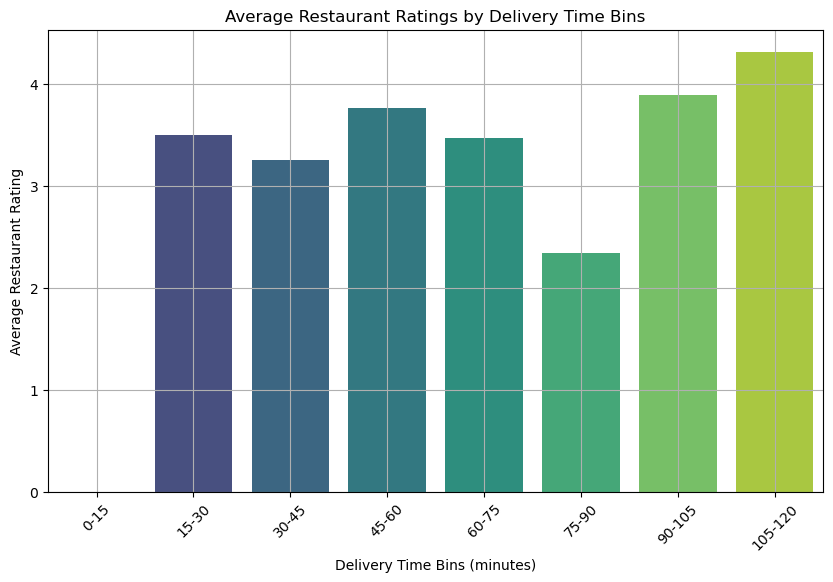

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins and labels
bins = [0, 15, 30, 45, 60, 75, 90, 105, 120]
labels = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90', '90-105', '105-120']

# Create delivery time bins
df['Time_Bin'] = pd.cut(df['delivery_time'], bins=bins, labels=labels, right=False)

# Calculate average restaurant ratings per bin
grouped_data = df.groupby('Time_Bin')['review_rating'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Time_Bin', y='review_rating', data=grouped_data, palette='viridis')
plt.title('Average Restaurant Ratings by Delivery Time Bins')
plt.xlabel('Delivery Time Bins (minutes)')
plt.ylabel('Average Restaurant Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




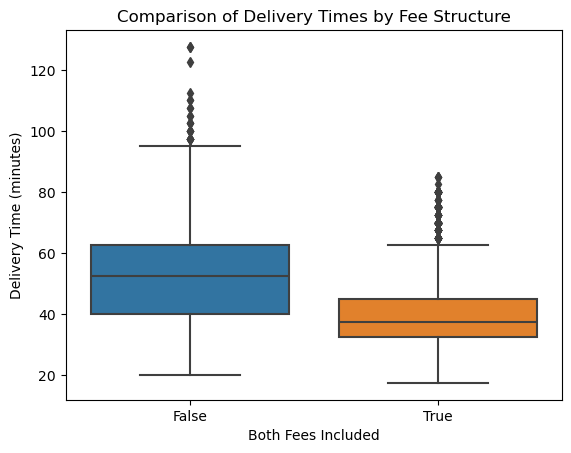

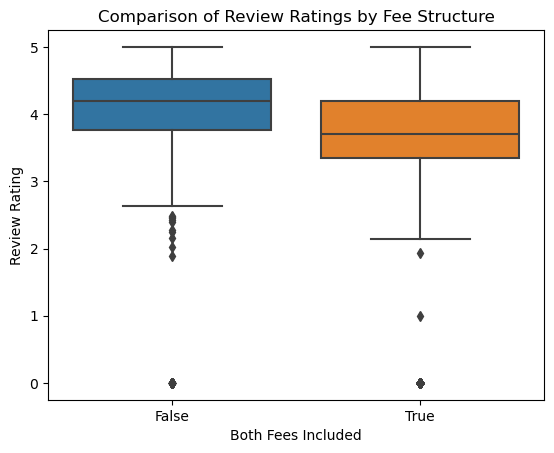

In [37]:
df['both_fees_included'] = ((df['service_fee'] > 0) & (df['delivery_fee'] > 0))

# Box plots to compare delivery times
sns.boxplot(data=df, x='both_fees_included', y='delivery_time')
plt.title('Comparison of Delivery Times by Fee Structure')
plt.xlabel('Both Fees Included')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Box plots to compare review ratings
sns.boxplot(data=df, x='both_fees_included', y='review_rating')
plt.title('Comparison of Review Ratings by Fee Structure')
plt.xlabel('Both Fees Included')
plt.ylabel('Review Rating')
plt.show()

In [38]:
from scipy.stats import ttest_ind

# Subset data
both_fees = df[df['both_fees_included'] == True]
only_delivery_fee = df[df['both_fees_included'] == False]

# T-tests
time_stat, time_p = ttest_ind(both_fees['delivery_time'], only_delivery_fee['delivery_time'])
rating_stat, rating_p = ttest_ind(both_fees['review_rating'], only_delivery_fee['review_rating'])

print(f"Delivery Time T-test results: statistic = {time_stat}, p-value = {time_p}")
print(f"Review Rating T-test results: statistic = {rating_stat}, p-value = {rating_p}")

Delivery Time T-test results: statistic = -40.93100439815764, p-value = 0.0
Review Rating T-test results: statistic = -21.75760309708682, p-value = 4.745477903618708e-102


Correlation between Restaurant Ratings and Delivery Times: 0.04378645572293611
                            OLS Regression Results                            
Dep. Variable:          review_rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.410e+28
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        01:18:35   Log-Likelihood:                 1161.7
No. Observations:                  39   AIC:                            -2317.
Df Residuals:                      36   BIC:                            -2312.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

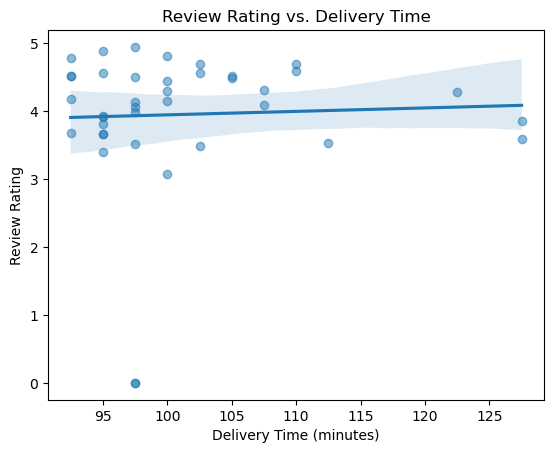

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


long_delivery_df = df[df['delivery_time'] > 90]

# Correlation Analysis
# Calculate Pearson correlation between restaurant ratings and review ratings
correlation = long_delivery_df['review_rating'].corr(long_delivery_df['delivery_time'])
print("Correlation between Restaurant Ratings and Delivery Times:", correlation)

# Regression Analysis
# Adding a constant for OLS
X = sm.add_constant(long_delivery_df[['review_rating', 'delivery_time']])
y = long_delivery_df['review_rating']
model = sm.OLS(y, X).fit()
print(model.summary())

# Visualizing the relationship
sns.regplot(x='delivery_time', y='review_rating', data=long_delivery_df, scatter_kws={'alpha':0.5})
plt.title('Review Rating vs. Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Review Rating')
plt.show()


In [40]:
#research question 5
print(df[['distance', 'delivery_time', 'service_fee', 'delivery_fee']].describe())
print(df[['distance', 'delivery_time', 'service_fee', 'delivery_fee']].isnull().sum())

          distance  delivery_time  service_fee  delivery_fee
count  8088.000000    8088.000000  8088.000000   8088.000000
mean      1.129827      42.542347     6.156992      2.446825
std       0.537953      14.424705     4.881617      1.212511
min       0.010000      17.500000     0.000000      0.000000
25%       0.690000      32.500000     5.250000      1.990000
50%       1.180000      40.000000     5.250000      2.490000
75%       1.590000      50.000000    10.000000      2.990000
max       2.000000     127.500000    21.000000     19.990000
distance         0
delivery_time    0
service_fee      0
delivery_fee     0
dtype: int64


In [41]:
df_cleaned = df.dropna(subset=['distance', 'delivery_time', 'service_fee', 'delivery_fee'])

# Optionally, handle outliers in distance or fees
# For example, removing extremely unlikely distances or fees
q_high = df_cleaned['distance'].quantile(0.99)  # Remove the top 1% of distances if they are outliers
df_cleaned = df_cleaned[df_cleaned['distance'] <= q_high]

In [42]:
# Calculate correlations
correlation_matrix = df_cleaned[['distance', 'delivery_time', 'service_fee', 'delivery_fee']].corr()
print(correlation_matrix)


               distance  delivery_time  service_fee  delivery_fee
distance       1.000000       0.148533     0.079444      0.332366
delivery_time  0.148533       1.000000    -0.106343      0.360667
service_fee    0.079444      -0.106343     1.000000      0.096557
delivery_fee   0.332366       0.360667     0.096557      1.000000


In [43]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Linear regression for distance and delivery time
X = df_cleaned[['distance']]
y = df_cleaned['delivery_time']
model_delivery_time = LinearRegression().fit(X, y)
print('Coefficients for delivery time:', model_delivery_time.coef_)

# Linear regression for distance and service fee
y_fee = df_cleaned['service_fee']
model_service_fee = LinearRegression().fit(X, y_fee)
print('Coefficients for service fee:', model_service_fee.coef_)

# Linear regression for distance and delivery fee
x_fee = df_cleaned['delivery_fee']
model_service_fee = LinearRegression().fit(X, y_fee)
print('Coefficients for delivery fee:', model_service_fee.coef_)



Coefficients for delivery time: [4.00163116]
Coefficients for service fee: [0.72432162]
Coefficients for delivery fee: [0.72432162]


In [44]:
# Define distance bins
bins = [0, 1, 2, 3]  # Adjust these bins based on your data's range and distribution
labels = ['0-1', '1-2' ,'2-3']
df['distance_bin'] = pd.cut(df['distance'], bins=bins, labels=labels, include_lowest=True)

# Check how many entries fall into each bin
print(df['distance_bin'].value_counts())


distance_bin
1-2    4850
0-1    3238
2-3       0
Name: count, dtype: int64


/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/2832144257.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delivery_time = df.groupby('distance_category')['delivery_time'].mean().reset_index()
/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/2832144257.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delivery_fee = df.groupby('distance_category')['delivery_fee'].mean().reset_index()
/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/2832144257.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future

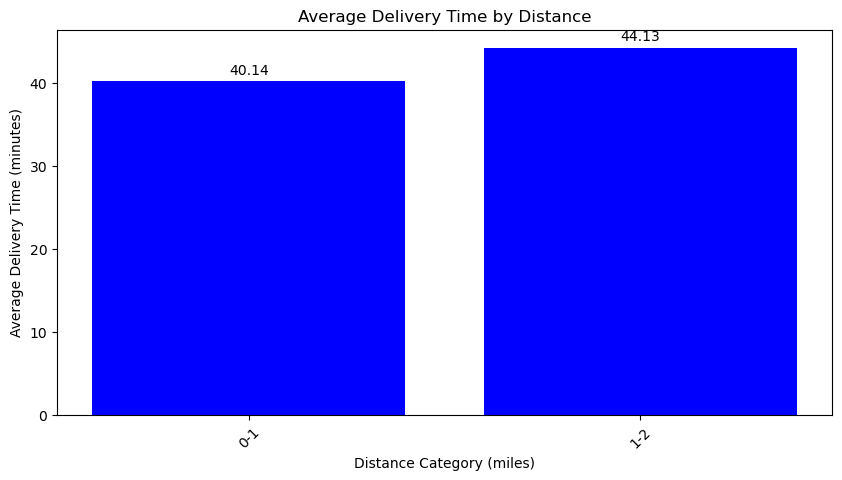

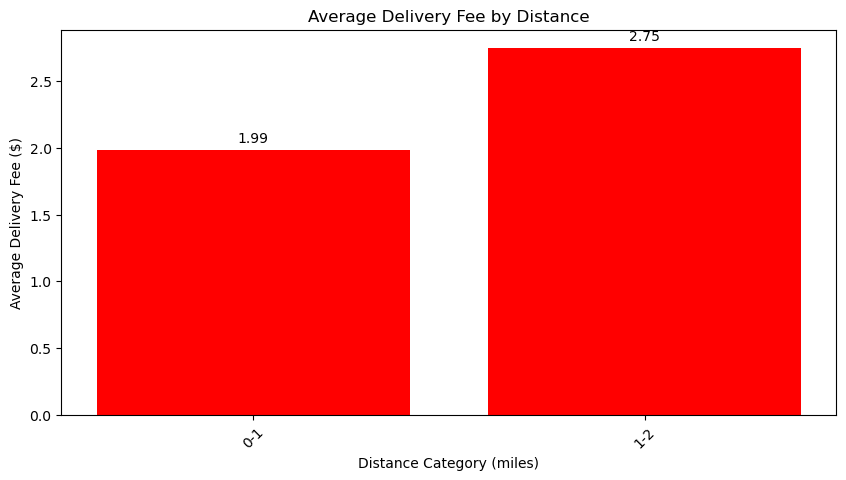

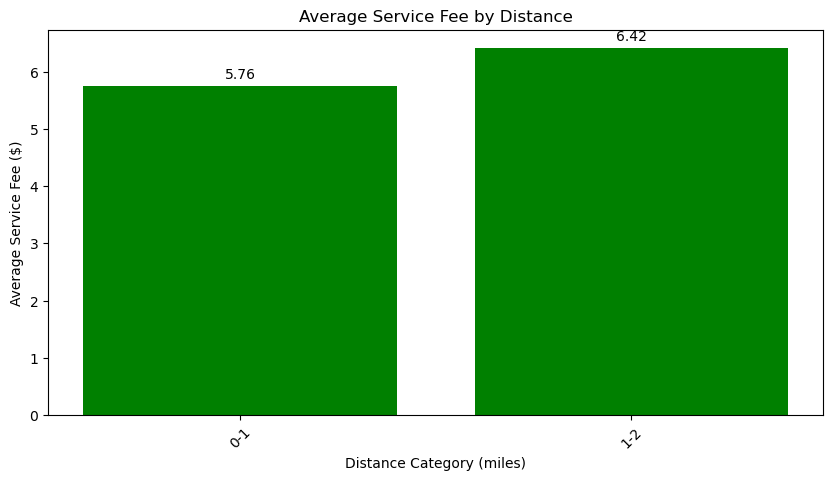

In [45]:
# Define bins and labels for categorizing 'distance'
bins = [0, 1, 2]  # Adjust this based on your data's range and needs
labels = ['0-1', '1-2']

# Categorize distances
df['distance_category'] = pd.cut(df['distance'], bins=bins, labels=labels, right=False)

# Calculate average metrics for each category
avg_delivery_time = df.groupby('distance_category')['delivery_time'].mean().reset_index()
avg_delivery_fee = df.groupby('distance_category')['delivery_fee'].mean().reset_index()
avg_service_fee = df.groupby('distance_category')['service_fee'].mean().reset_index()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.figure(figsize=(10, 5))
bars = plt.bar(avg_delivery_time['distance_category'], avg_delivery_time['delivery_time'], color='blue')
add_labels(bars)
plt.title('Average Delivery Time by Distance')
plt.xlabel('Distance Category (miles)')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

# Plotting average delivery fee by distance category
plt.figure(figsize=(10, 5))
bars = plt.bar(avg_delivery_fee['distance_category'], avg_delivery_fee['delivery_fee'], color='red')
add_labels(bars)
plt.title('Average Delivery Fee by Distance')
plt.xlabel('Distance Category (miles)')
plt.ylabel('Average Delivery Fee ($)')
plt.xticks(rotation=45)
plt.show()

# Plotting average service fee by distance category
plt.figure(figsize=(10, 5))
bars = plt.bar(avg_service_fee['distance_category'], avg_service_fee['service_fee'], color='green')
add_labels(bars)
plt.title('Average Service Fee by Distance')
plt.xlabel('Distance Category (miles)')
plt.ylabel('Average Service Fee ($)')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Research Question 6
# Group by city and cuisine type, counting orders or using an existing order count column
cuisine_counts = df.groupby(['searched_state', 'Cuisine']).size().reset_index(name='order_count')

# Check the aggregated data
print(cuisine_counts.head())


  searched_state        Cuisine  order_count
0             CA       American          629
1             CA          Asian          227
2             CA        British            2
3             CA  Café/Desserts          117
4             CA      Ethiopian            1


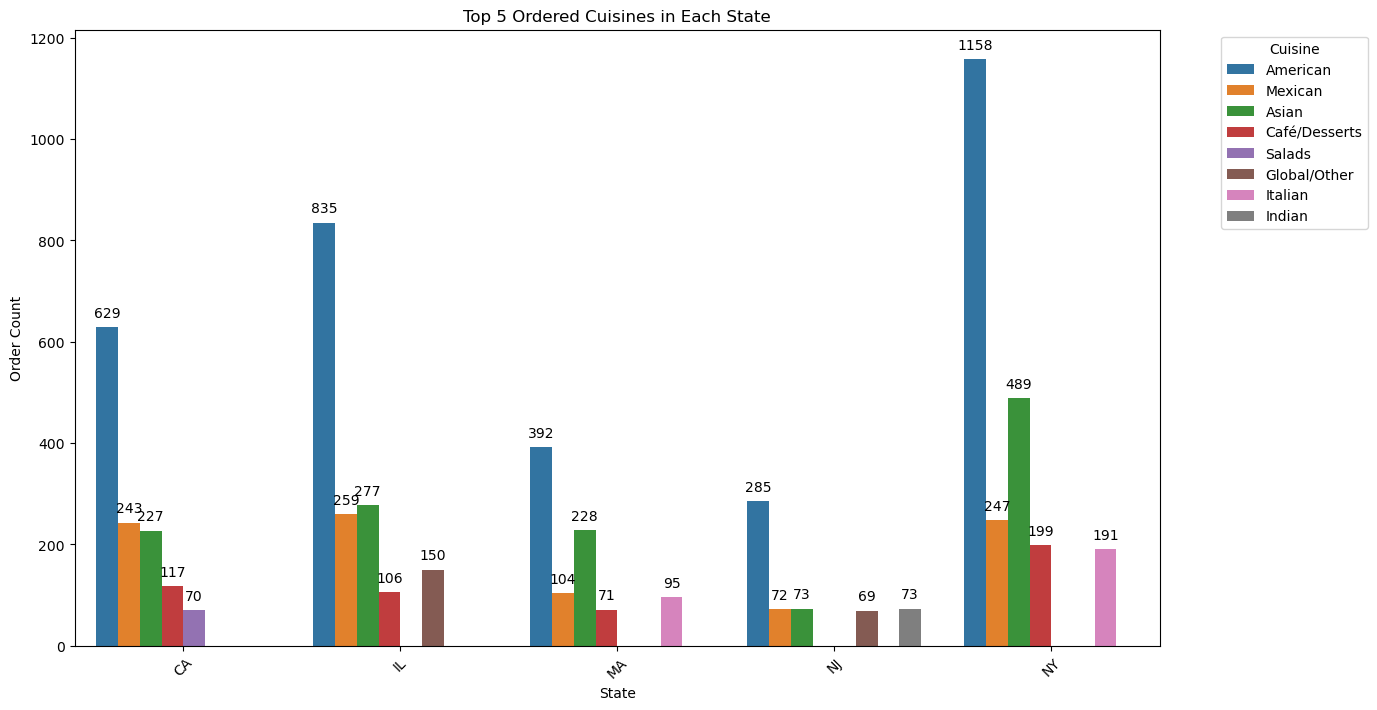

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=top_5_cuisines_per_state, x='searched_state', y='order_count', hue='Cuisine')
plt.title('Top 5 Ordered Cuisines in Each State')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate state labels for better readability

# Add labels above each bar
for p in bar_plot.patches:
    height = p.get_height()
    # Check if height is NaN and only annotate if it is not
    if not pd.isna(height):
        bar_plot.annotate(f'{int(height)}',  # convert height to an integer to avoid decimals
                          (p.get_x() + p.get_width() / 2, height),  # position for the label (center of the bar, at the top)
                          ha='center',  # center alignment
                          va='bottom',  # bottom vertical alignment makes it appear above the bar
                          textcoords="offset points",
                          xytext=(0, 5))  # 5 points vertical offset

plt.show()



Analyzing NY


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/3274968010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Cluster'] = kmeans.fit_predict(state_data[['latitude', 'longitude']])


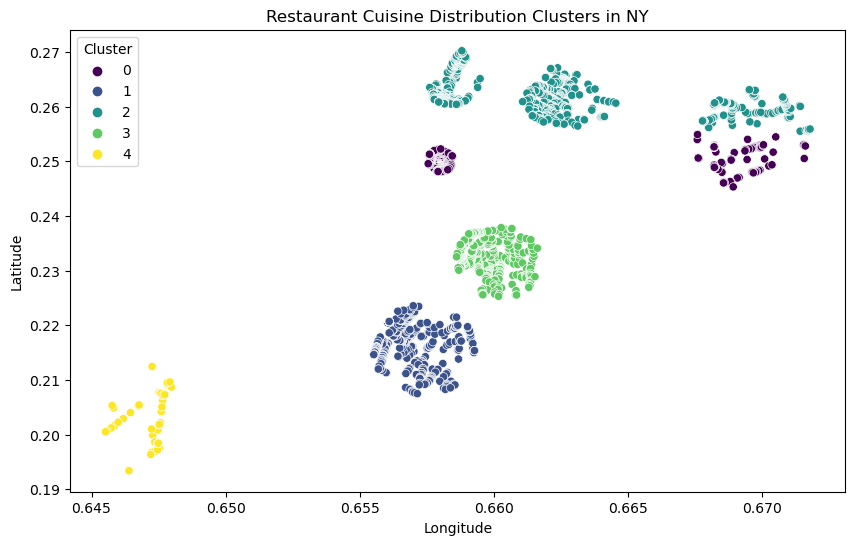

Underrepresented Cuisines by Cluster in NY:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

Analyzing NJ


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/3274968010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Cluster'] = kmeans.fit_predict(state_data[['latitude', 'longitude']])


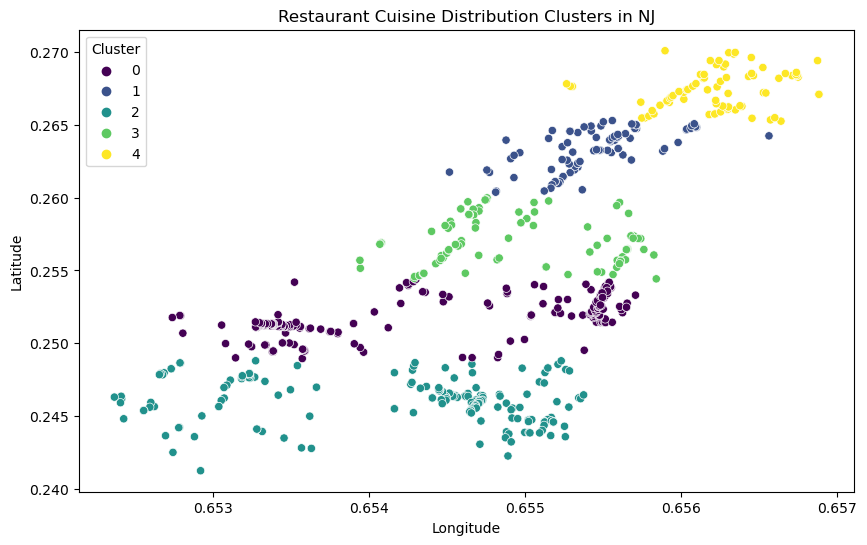

Underrepresented Cuisines by Cluster in NJ:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

Analyzing CA


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/3274968010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Cluster'] = kmeans.fit_predict(state_data[['latitude', 'longitude']])


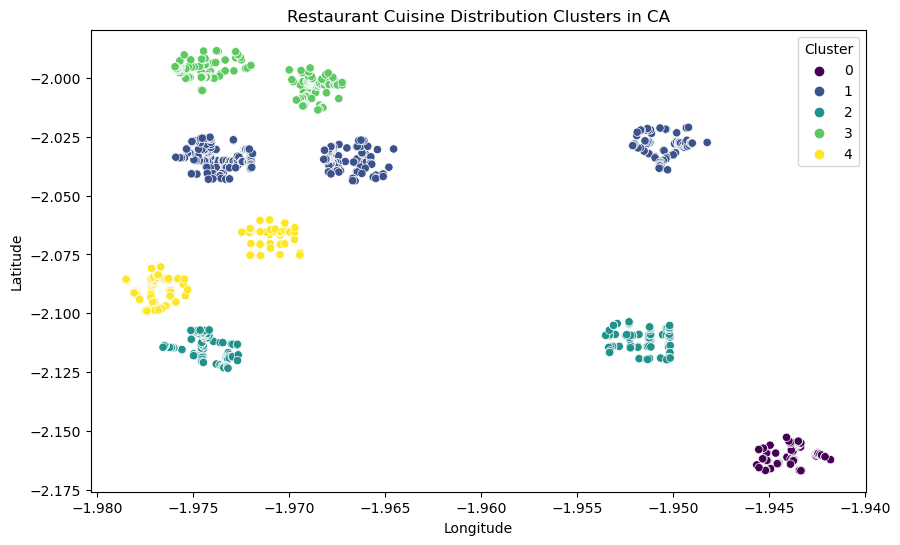

Underrepresented Cuisines by Cluster in CA:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

Analyzing IL


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/3274968010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Cluster'] = kmeans.fit_predict(state_data[['latitude', 'longitude']])


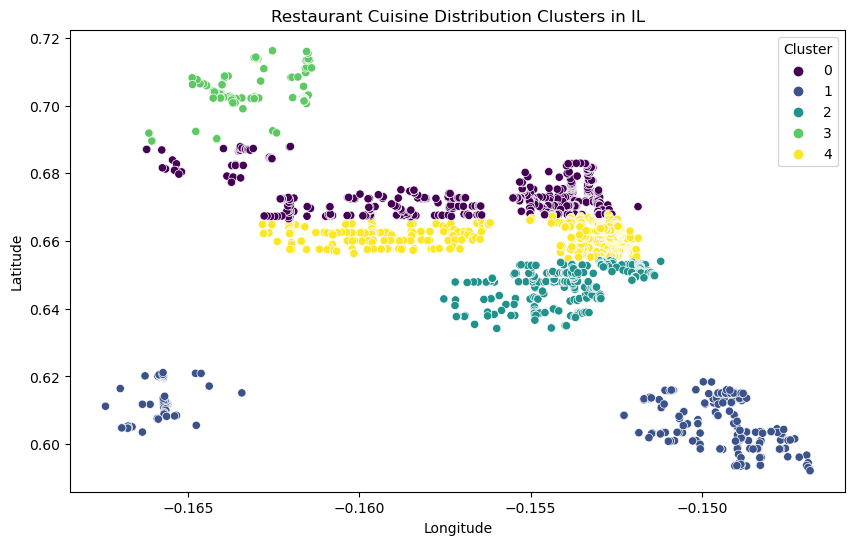

Underrepresented Cuisines by Cluster in IL:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

Analyzing MA


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/t4/b7zs8dhn7qxcf58p14sfmg440000gn/T/ipykernel_32273/3274968010.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Cluster'] = kmeans.fit_predict(state_data[['latitude', 'longitude']])


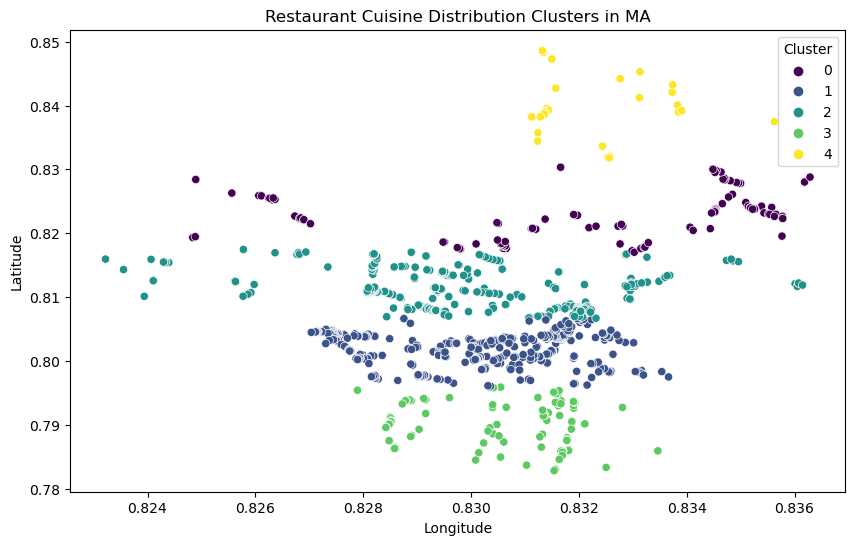

Underrepresented Cuisines by Cluster in MA:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Encoding the 'Cuisine' column using get_dummies for numerical analysis
df_encoded = pd.get_dummies(df, columns=['Cuisine'], prefix='', prefix_sep='')

# Step 2: Drop non-numeric and unnecessary columns to prepare for clustering
columns_to_drop = ['searched_address', 'loc_name', 'loc_number', 'url', 'address', 'phone', 'RunDate']
df_encoded.drop(columns=columns_to_drop, inplace=True)

# Normalize the geographic coordinates (ensure they are numeric first)
df_encoded[['latitude', 'longitude']] = df_encoded[['latitude', 'longitude']].apply(pd.to_numeric, errors='coerce')
df_encoded.dropna(subset=['latitude', 'longitude'], inplace=True)  # Drop rows where conversion failed

scaler = StandardScaler()
df_encoded[['latitude', 'longitude']] = scaler.fit_transform(df_encoded[['latitude', 'longitude']])

# Process each state separately
for state in df['searched_state'].unique():
    print(f"\nAnalyzing {state}")
    state_data = df_encoded[df_encoded['searched_state'] == state]

    if state_data.empty or len(state_data) < 5:  # Ensure there is enough data to perform clustering
        print(f"Not enough data to perform clustering in {state}")
        continue

    # Clustering within the state
    kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
    state_data['Cluster'] = kmeans.fit_predict(state_data[['latitude', 'longitude']])

    # Visualization of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=state_data, palette='viridis', legend='full')
    plt.title(f'Restaurant Cuisine Distribution Clusters in {state}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    # Analyzing the cuisine distribution within each cluster
    # Focus on cuisine columns for summing
    cuisine_columns = [col for col in state_data.columns if col.startswith('Cuisine_')]
    cluster_cuisine_distribution = state_data.groupby('Cluster')[cuisine_columns].sum()

    # Identify underrepresented cuisines in each cluster
    # Define underrepresented as those making up less than 10% of the cluster's total for each cuisine
    total_cuisines = cluster_cuisine_distribution.sum(axis=1)
    underrepresented_cuisines = cluster_cuisine_distribution.apply(lambda x: x < (0.5 * total_cuisines), axis=0)
    print(f"Underrepresented Cuisines by Cluster in {state}:\n{underrepresented_cuisines}")


Unique states in dataset: ['NY' 'NJ' 'CA' 'IL' 'MA']


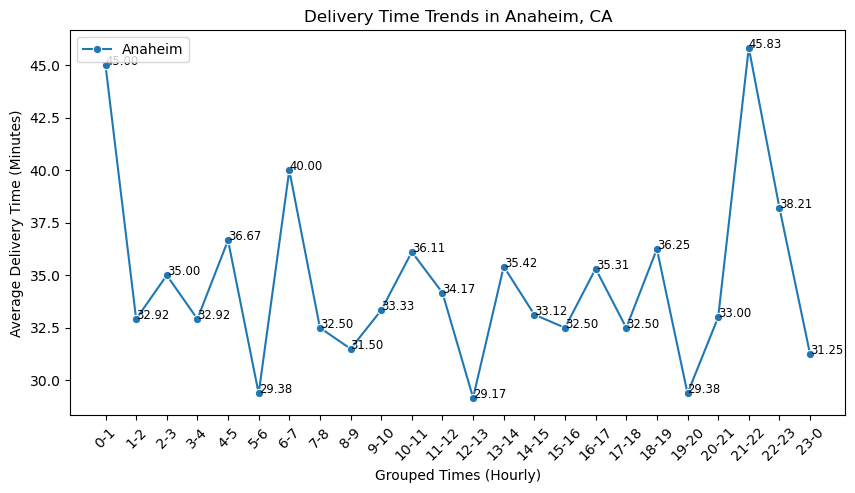

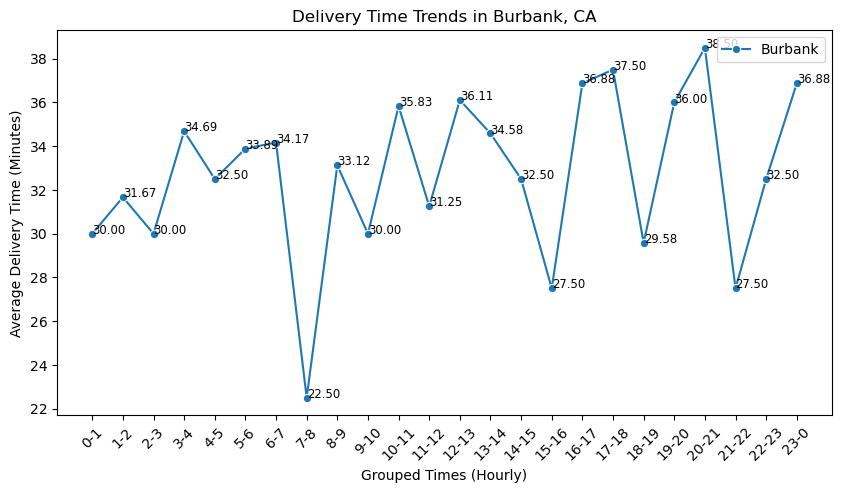

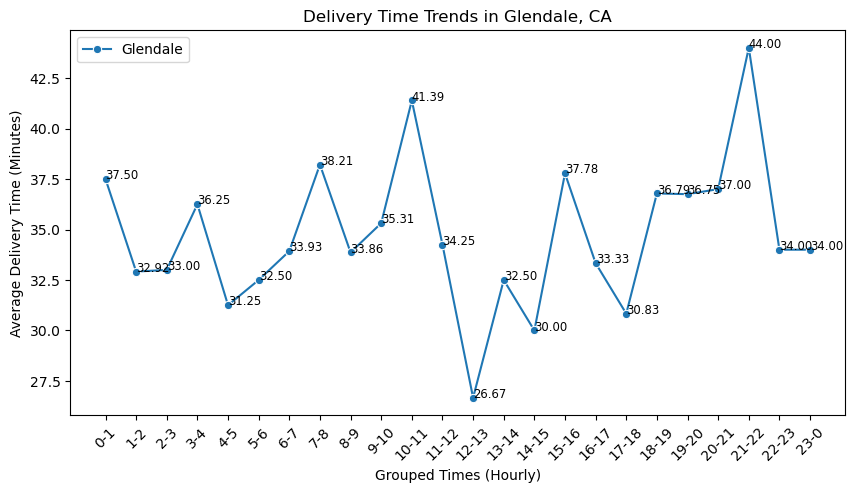

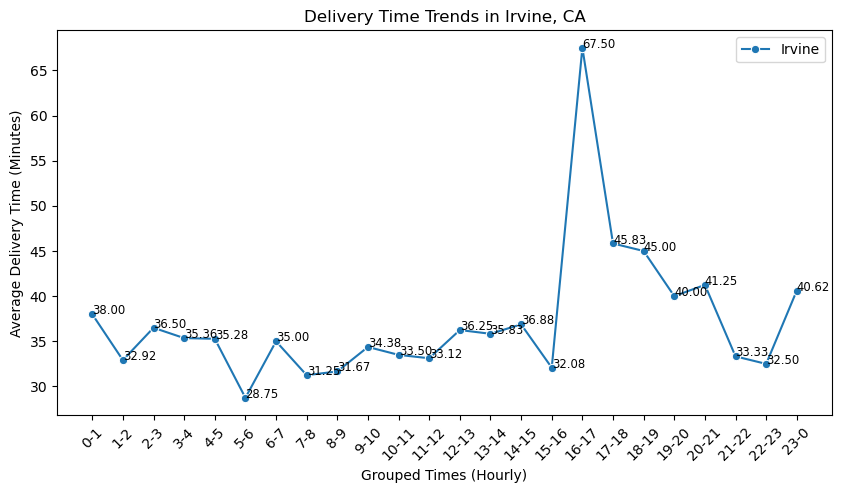

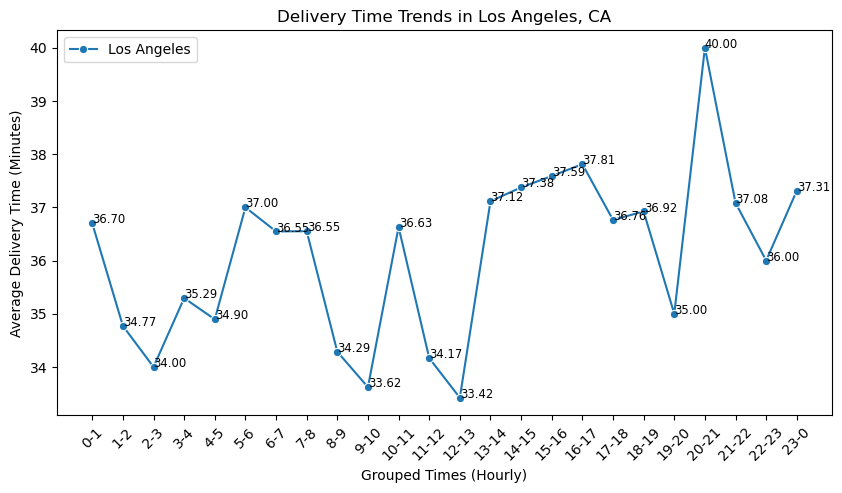

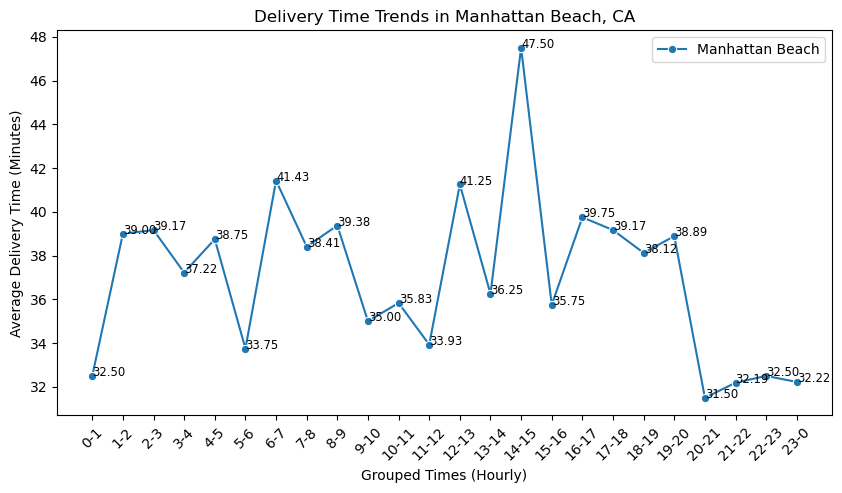

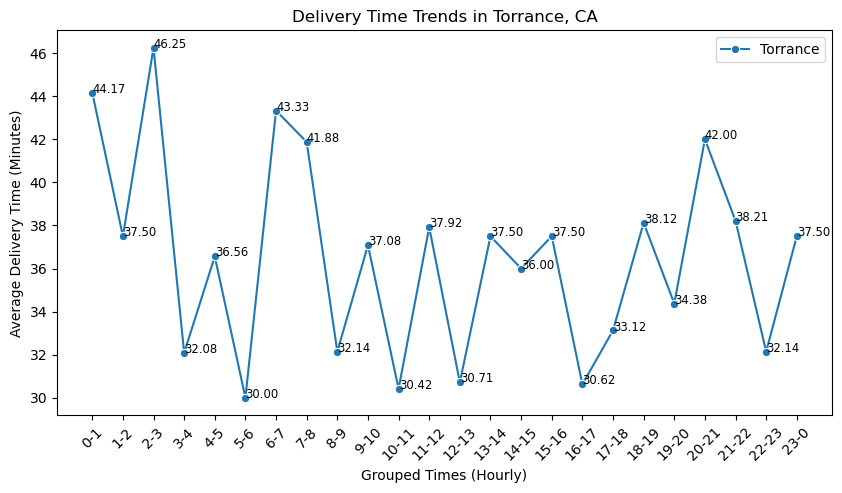

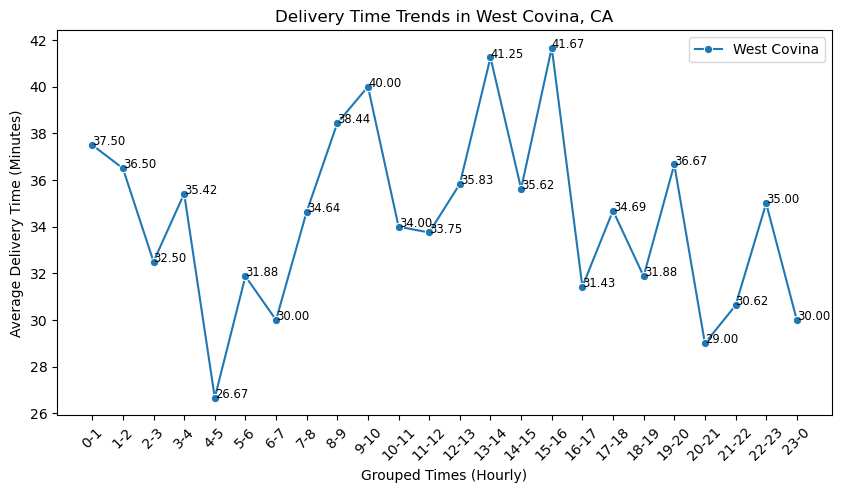

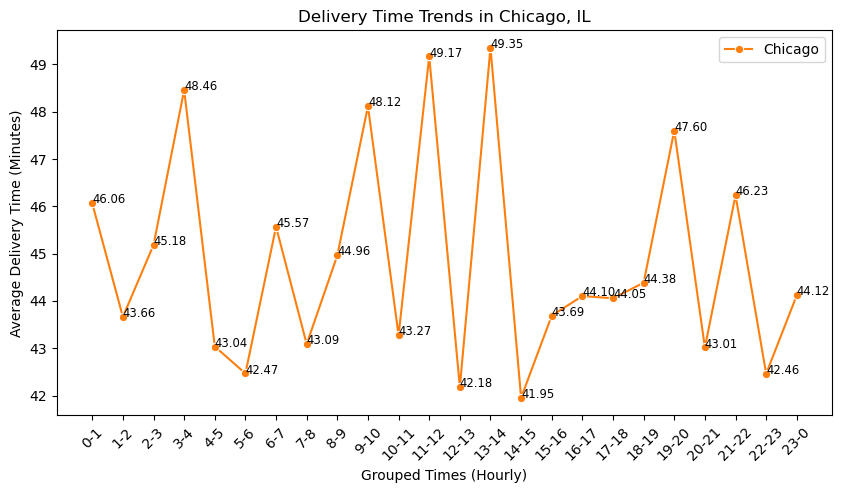

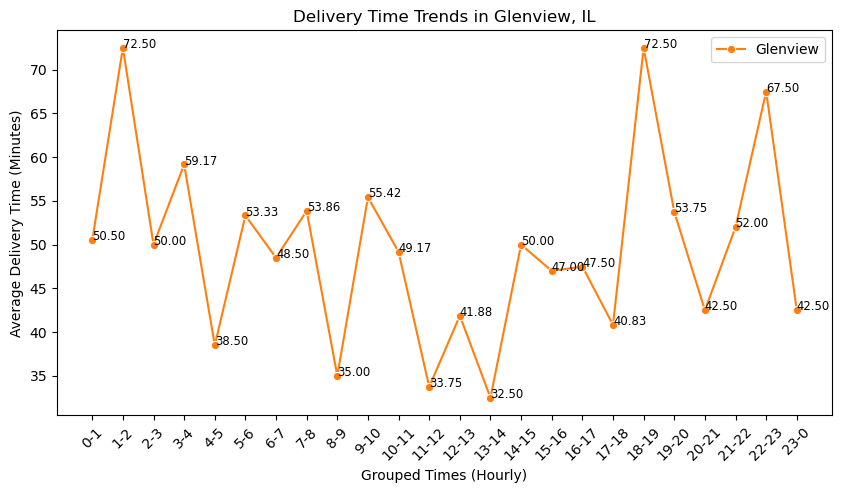

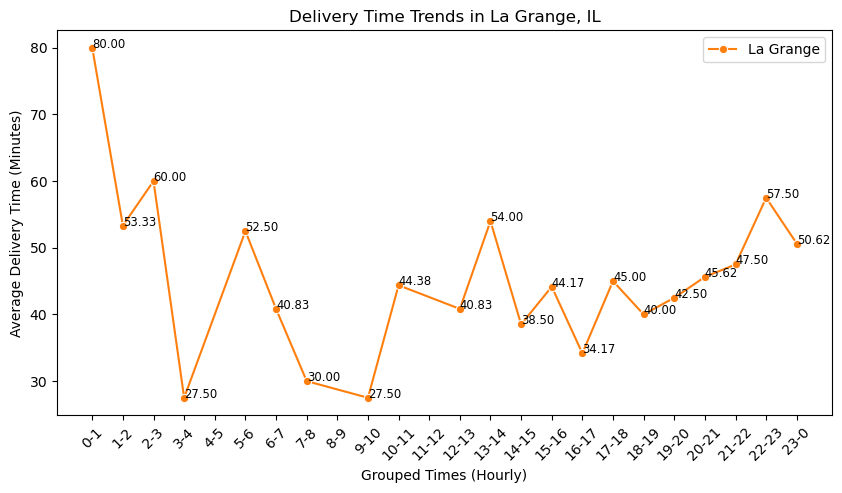

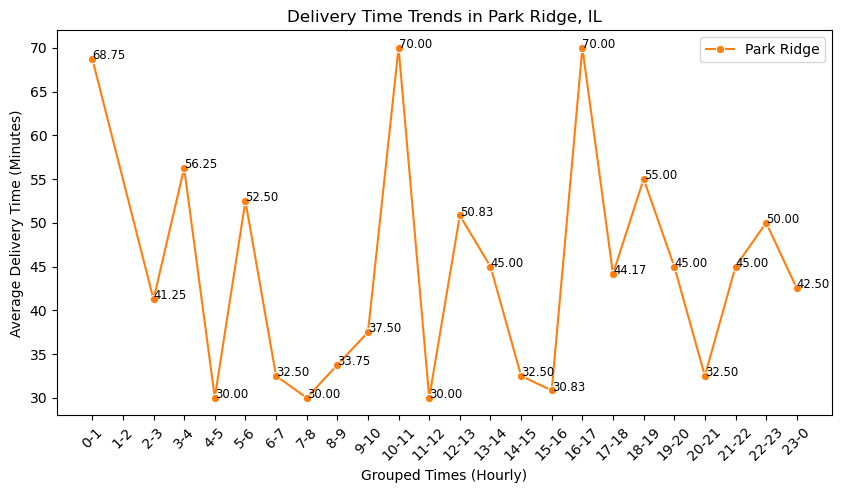

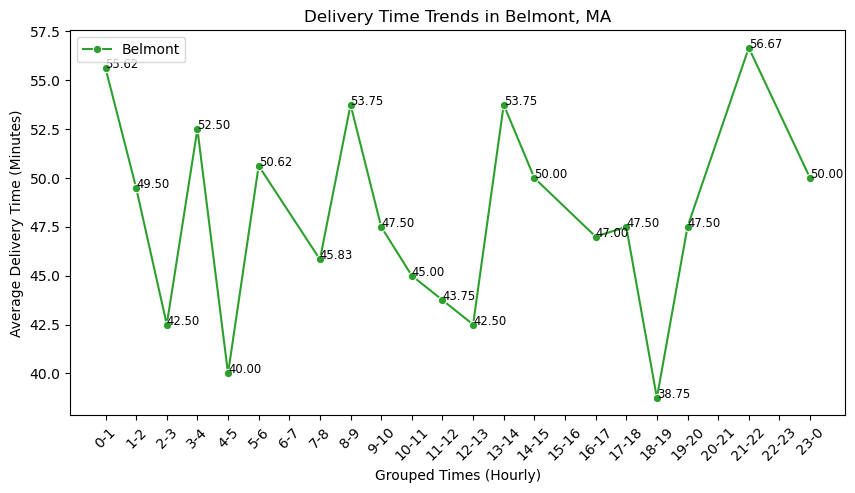

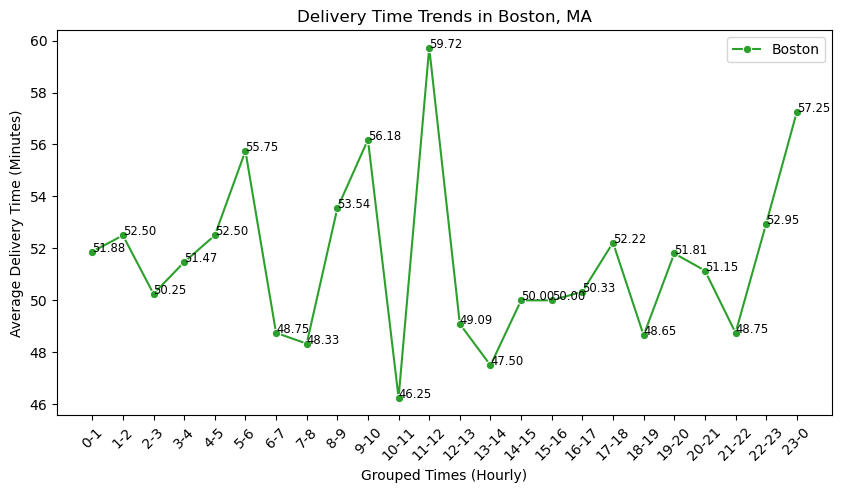

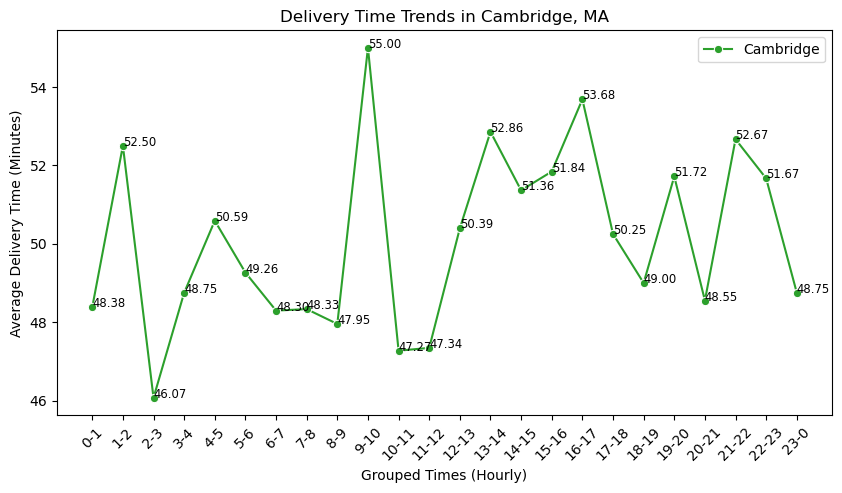

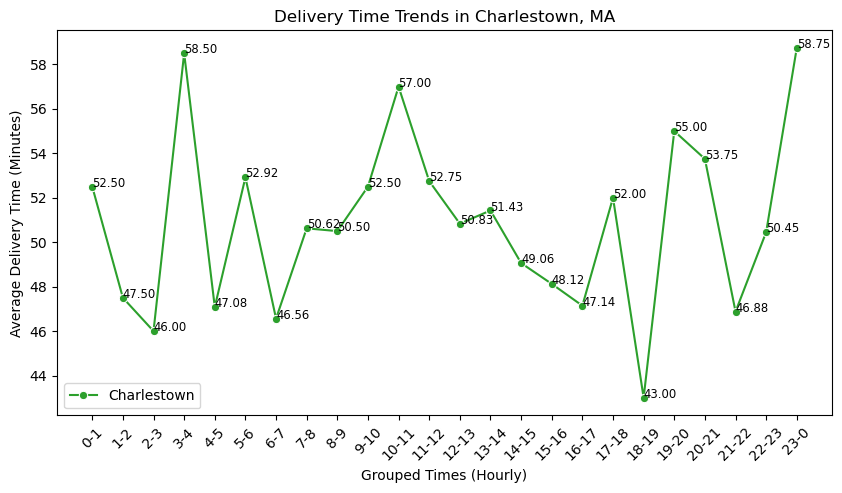

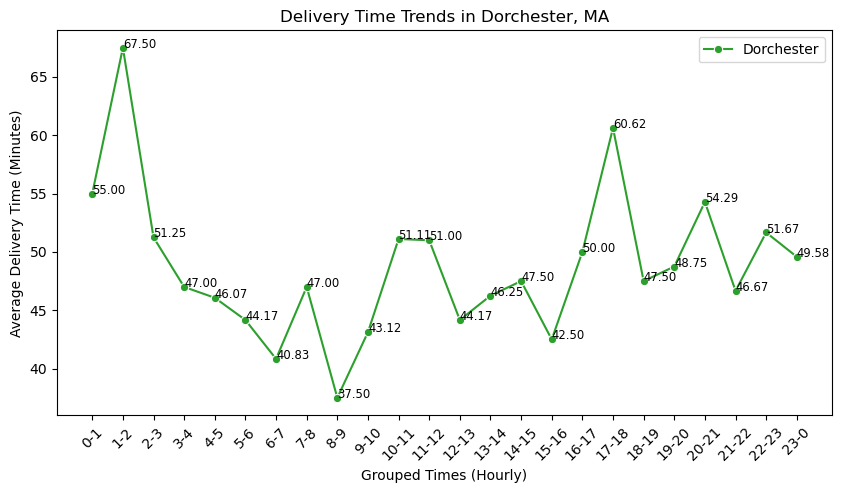

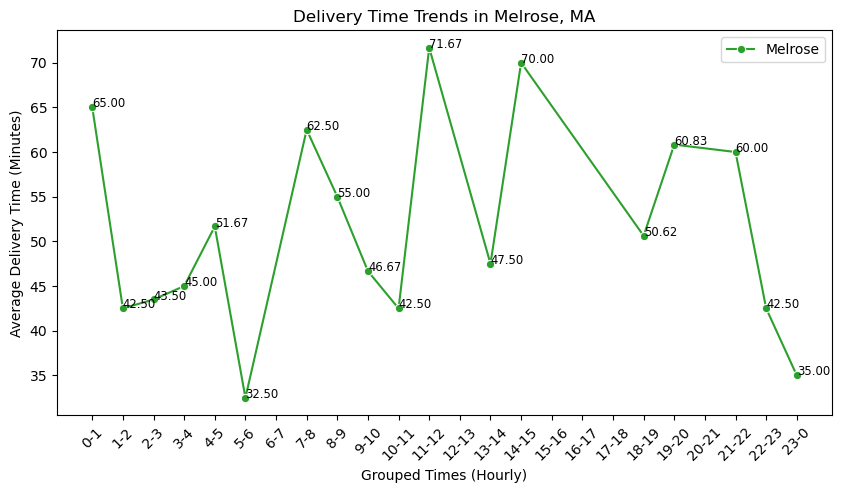

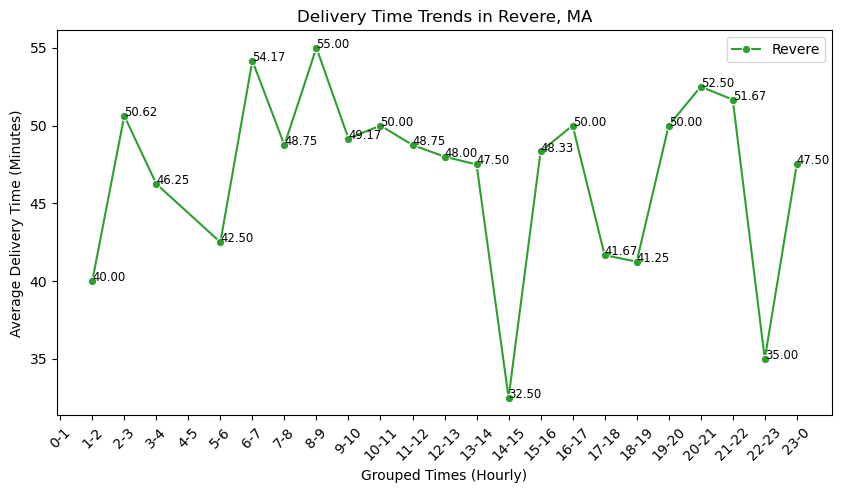

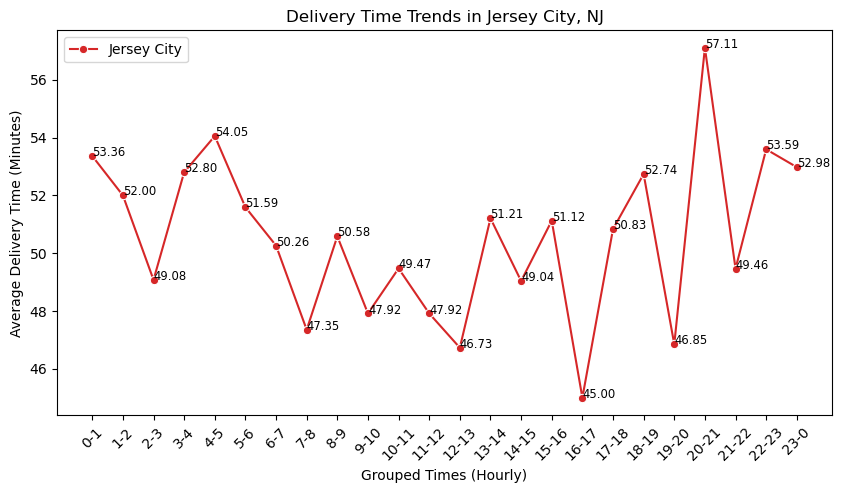

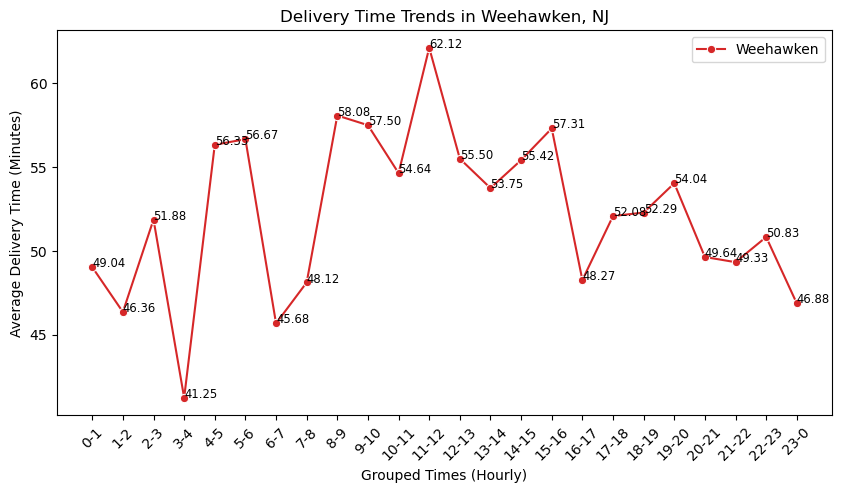

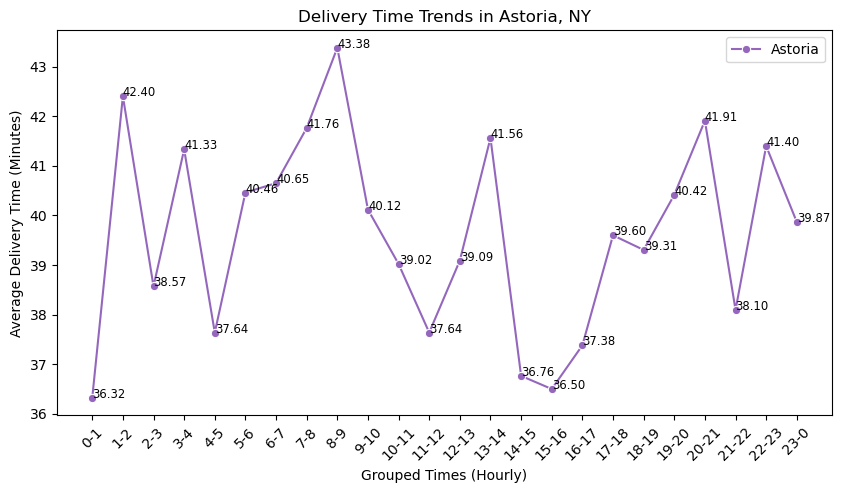

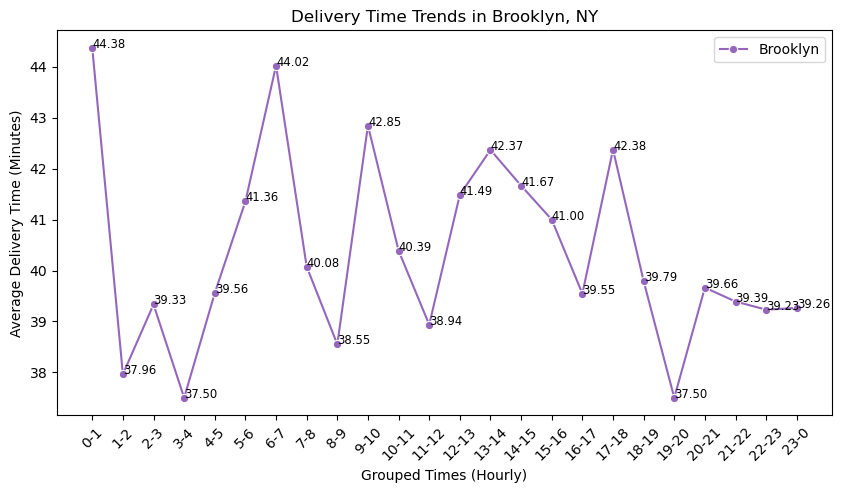

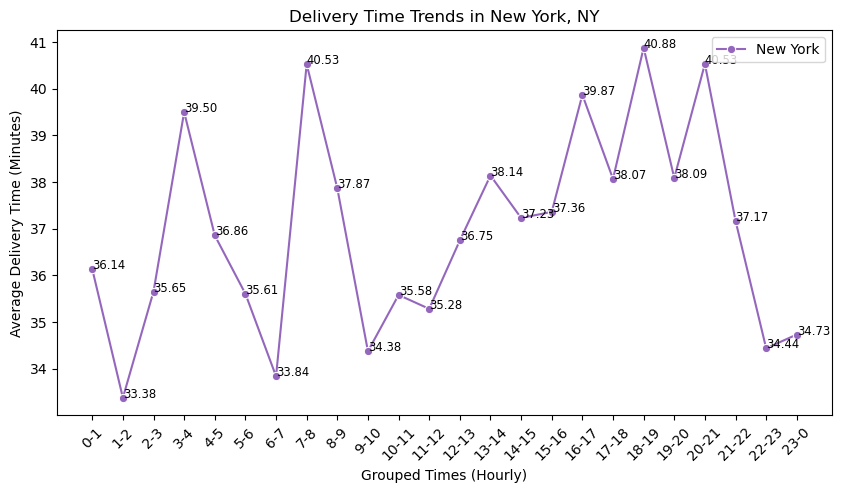

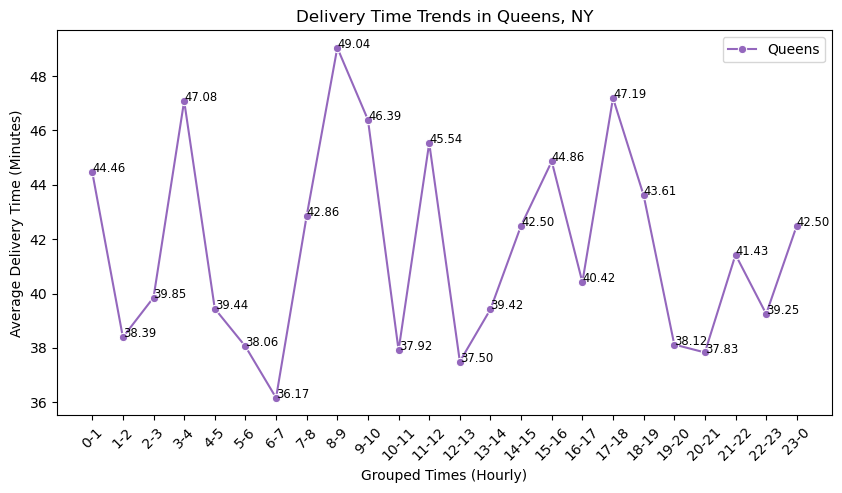

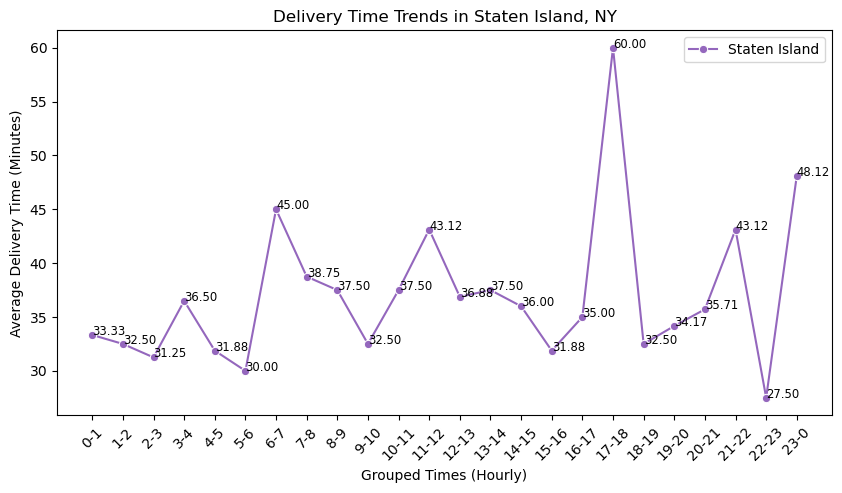

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('/Users/madhusudhanunnava/Desktop/grub hub.xlsx', sheet_name='grubhub')
print("Unique states in dataset:", data['searched_state'].unique())

# Define state colors
state_colors = {
    'CA': '#1f77b4',  # blue
    'IL': '#ff7f0e',  # orange
    'MA': '#2ca02c',  # green
    'NJ': '#d62728',  # red
    'NY': '#9467bd'   # purple
}

# Ensured the 'Grouped Times' column is treated as a categorical variable with specific order
grouped_times_order = [f"{h}-{(h+1) % 24}" for h in range(24)]

# Plot data for each city within the specified states
for state, color in state_colors.items():
    state_data = data[data['searched_state'] == state]

    if state_data.empty:
        print(f"No data available for {state}. Check dataset or state code.")
    else:
        pivot_data_state = pd.pivot_table(state_data, values='delivery_time', index=['searched_city', 'Grouped Times'],
                                          aggfunc='mean').reset_index()
        pivot_data_state['Grouped Times'] = pd.Categorical(pivot_data_state['Grouped Times'], categories=grouped_times_order, ordered=True)

        cities = pivot_data_state['searched_city'].unique()
        for city in cities:
            city_data = pivot_data_state[pivot_data_state['searched_city'] == city]
            plt.figure(figsize=(10, 5))
            sns.lineplot(data=city_data, x='Grouped Times', y='delivery_time', marker="o", label=city, color=color)

            # Add data labels
            for line in range(len(city_data)):
                plt.text(city_data['Grouped Times'].cat.codes.iloc[line], city_data['delivery_time'].iloc[line],
                         f"{city_data['delivery_time'].iloc[line]:.2f}", horizontalalignment='left', size='small', color='black')

            plt.title(f'Delivery Time Trends in {city}, {state}')
            plt.xticks(rotation=45)
            plt.xlabel('Grouped Times (Hourly)')
            plt.ylabel('Average Delivery Time (Minutes)')
            plt.legend()
            plt.show()
